In [1]:
import numpy as np
import math
import sys
import statistics
import csv
import matplotlib.pyplot as plt

Ground Truth

In [2]:
gt = {}
benchmarks = ["pi", "GPA", "tug_of_war", "altermu2", "normal_mixture", "spacex", "zeroone", "weekend", "conjugate_gaussians"]

gt["pi"] = (5 - math.pi)/4
gt["GPA"] = 0.6115107913669064
gt["tug_of_war"] = 0.5
gt["altermu2"] = 0.1550617483
gt["normal_mixture"] = {"theta": 12/42, "mu1": -9.702359975571609, "mu2": 9.657948191704119}
gt["spacex"] = 30.00463476991299
gt["zeroone"] = {"w1": 0.0565823032448, "w2": 3.68882559517}
gt["weekend"] = 0.3742061754266954
gt["conjugate_gaussians"] = 1.0
gt["conjugate_gaussians2"] = 17/3
gt["coinBias"] = 5/12
gt["addFun_sum"] = 0.0
gt["clickGraph"] = 0.614154185582757
gt["addFun_max"] = 1/math.sqrt(math.pi)
gt["clinicalTrial2"] = 2/7
gt["clinicalTrial1"] = 1 - 78460907384924307566949191554862076141244676160/94572409612368043294199619316675018741649913883
gt["trueskill"] = 0.5
gt["laplace_scaling"] = 0.5
gt["hmm"] = 0.5
gt["or"] = 0.5



Functions

In [3]:
def stan_accuracy(benchmark_name, var_name, gt, file_name="results.txt"):
    # file_name = "/space/poorvagarg/cmdstan-2.28.2/benchmarks/" + benchmark_name + "/" + file_name
    file_handle = open(file_name, "r")
    lines = file_handle.readlines()

    answer = 0
    for i in lines:
        current = i.split()
        # print(current)
        if current != []:
            if current[0] == var_name:
                answer = float(current[1])
    handle2 = open("stan_results.txt", "a")
    handle2.writelines(benchmark_name + "," + var_name + "," + str(abs(gt - answer)) + "\n")
    handle2.close()
    return abs(gt - answer)

def AQUA_accuracy(benchmark_name, result_file, gt):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()

    min_error = 10000000    
    for i in lines:
        cur = float(i[:-1])
        if abs(gt - cur) < min_error:
            min_error = abs(gt - cur)
    return min_error

def Dice_accuracy(benchmark_name, result_file, gt, position, flag):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()
    
    min_error = 100000000
    min_line = ""
    for i in lines:
        # print(i)
        # print(position)
        bits = float(i.split(",")[0])
        pieces = (math.log2(float((i.split(",")[1]))))
        if pieces < bits/2.0:
            continue
        btime = float(i.split(",")[-1])
        if btime > 1200:
            continue
        cur = float(i.split(",")[position])
        # if float(i.split(",")[1]) <= 8.0:
            # continue
        if (flag == None):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line=i
        elif (float(i.split(",")[flag[1]]) == flag[0]):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line = i
        else:
            continue
    print(min_line)
    return min_error

def WebPPL_accuracy(benchmark, method, gt, upperlimit, suffix="", flag = True, lower_limit=2):
    min_error = 1000000000
    a = 0
    # for number in range(16, 17):
    for number in range(lower_limit,upperlimit+1):
        print(number)
    # for number in range(24, 25):
        ans = []
        
        
        
        if not flag:
            file_handle = open("/space/poorvagarg/webppl_benchmarks/" + benchmark + "/results_7200/output" + suffix + "_" + method + "_" + str(number) + ".txt", "r")
        else:
            print(benchmark, suffix, method, number)
            file_handle = open("/space/poorvagarg/webppl_benchmarks/" + benchmark + "/output" + suffix + "_" + method + "_" + str(number) + ".txt", "r")
        
        lines = file_handle.readlines()
        # lines = lines[0:10]
        for i in lines:
            # print(i)
            
            if i.split() == []:
                continue
            if i.split()[0] == "{":
                # print(float(i.split()[2][:-1]))

                if int(i.split()[-2]) > 1200000:
                    continue
                ans.append(abs(float(i.split()[2][:-1]) - gt))
            else:
                continue
        if ans == []:
            # print(number)
            continue
        
        cur = statistics.mean(ans)
        # print(statistics.mean(ans), statistics.stdev(ans))
        # print(cur, gt)
        if (cur < min_error):
            a = number
            print("yo")
            print(number)
            min_error = cur
    # print(number)
    return min_error

def write_csv(data):
    with open("/space/poorvagarg/.julia/dev/Dice/benchmarks/results.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(data)

def stan_iterations(filename):
    f = open(filename, "r")
    a = f.readlines()[1]
    iter = a[a.find("(") + 1:a.find(")")]
    print(iter)
    return int(iter)









Pi

In [6]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("pi", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/pi/results2.txt", gt["pi"], 1, None)
webppl_rej_res = WebPPL_accuracy("pi", "rejection", gt["pi"], 40)
webppl_mcmc_res = WebPPL_accuracy("pi", "MCMC", gt["pi"], 40)
webppl_smc_res = WebPPL_accuracy("pi", "SMC", gt["pi"], 40)
# psi_res = "remaining integrals"
stan_res = stan_accuracy("pi", "answer", 1 - gt["pi"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/pi/results_1200.txt")

# stan_res

# write_csv(["pi", aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, psi_res])
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res


8.0,0.46287536621093756,223.626791841

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


('Not supported',
 0.0017264703916141655,
 9.122033927102535e-05,
 9.741326186318844e-05,
 0.0012900914210840497,
 4.836339744829221e-05)

GPA

In [13]:
aqua_res = AQUA_accuracy("GPA", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/GPA/results.txt", gt["GPA"])
dice_res = Dice_accuracy("GPA", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/GPA/results.txt", gt["GPA"], 2, None)
webppl_rej_res = WebPPL_accuracy("GPA", "rejection", gt["GPA"], 19)
webppl_mcmc_res = WebPPL_accuracy("GPA", "MCMC", gt["GPA"], 22)
webppl_smc_res = WebPPL_accuracy("GPA", "SMC", gt["GPA"], 40, flag=True)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res
# aqua_res, dice_res

20.0,1024.0,0.6115107913669062,153.40911844

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
22
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.3615107913668967,
 2.220446049250313e-16,
 0.01702872077338129,
 0.00928972642198742,
 0.013794120953237421)

Tug of War

In [12]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("tug_of_war", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/tug_of_war/results.txt", gt["tug_of_war"], 2, None)
webppl_rej_res = WebPPL_accuracy("tug_of_war", "rejection", gt["tug_of_war"], 27)
webppl_mcmc_res = WebPPL_accuracy("tug_of_war", "MCMC", gt["tug_of_war"], 33)
webppl_smc_res = WebPPL_accuracy("tug_of_war", "SMC", gt["tug_of_war"], 40)

stan_res = stan_accuracy("tug_of_war", "ans", gt["tug_of_war"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/tug_of_war/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

10.0,32.0,0.49994258591591584,31.63369172

2
yo
2
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
20
21
22
23
24
25
26
27
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
7
8
yo
8
9
yo
9
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
yo
24
25
26
27
28
29
30
31
32
33
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
15
yo
15
16
yo
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


('Not supported',
 5.741408408416193e-05,
 0.000653839111328125,
 0.0006935060024261475,
 0.00239105224609375,
 4.5069999999980404e-05)

Altermu2

In [25]:
aqua_res = AQUA_accuracy("altermu2", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/altermu2/results.txt", gt["altermu2"])
dice_res = Dice_accuracy("altermu2", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/altermu2/results.txt", gt["altermu2"], 2, None)
webppl_rej_res = WebPPL_accuracy("altermu2", "rejection", gt["altermu2"], 40)
webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 40)
webppl_smc_res = WebPPL_accuracy("altermu2", "SMC", gt["altermu2"], 40)
stan_res = stan_accuracy("altermu2",  "mu[1]", gt["altermu2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/altermu2/results_1200.txt")

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res
# dice_res, webppl_rej_res, webppl_mcmc_res

3.0,32.0,0.1550750016337119,25.575465161

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
5
6
7
yo
7
8
yo
8
9
yo
9
10
11
12
13
14
yo
14
15
16
17
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
4
5
6
7
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


(3.411889291371484e-07,
 1.3253333711910065e-05,
 0.001684008299999984,
 1000000000,
 0.4144364187555497,
 0.44800833729368594)

Normal Mixture

In [24]:
aqua_res = {}
aqua_res["theta"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results_1200.txt", gt["normal_mixture"]["theta"])
aqua_res["mu1"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results1_1200.txt", gt["normal_mixture"]["mu1"])
aqua_res["mu2"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results2_1200.txt", gt["normal_mixture"]["mu2"])

dice_res = {}
dice_res["theta"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["theta"], 2, (1, 3))
dice_res["mu1"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu1"], 2, (2, 3))
dice_res["mu2"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu2"], 2, (0, 3))

webppl_rej_res = {}
webppl_rej_res["theta"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["theta"], 9)
# webppl_rej_res["mu1"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu1"], 1, "2")
# webppl_rej_res["mu2"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu2"], 1, "3")

webppl_mcmc_res = {}
webppl_mcmc_res["theta"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["theta"], 32)
webppl_mcmc_res["mu1"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu1"], 26, "2")
webppl_mcmc_res["mu2"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu2"], 24, "3")

webppl_smc_res = {}
webppl_smc_res["theta"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["theta"], 40)
webppl_smc_res["mu1"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["mu1"], 40, "2")
webppl_smc_res["mu2"] = WebPPL_accuracy("normal_mixture", "SMC", gt["normal_mixture"]["mu2"], 40, "3")

stan_res = {}
stan_res["theta"] = stan_accuracy("normal_mixture", "theta", gt["normal_mixture"]["theta"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
stan_res["mu1"] = stan_accuracy("normal_mixture", "mu[1]", gt["normal_mixture"]["mu1"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
stan_res["mu2"] = stan_accuracy("normal_mixture", "mu[2]", gt["normal_mixture"]["mu2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/normal_mixture/results_1200.txt")
# webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
# # webppl_rej_res, webppl_mcmc_res, aqua_res, 
# dice_res, stan_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

3.0,1.0,0.2856593701886235,1.0,370.616781866

3.0,16.0,-9.697157710855773,2.0,408.978756263

3.0,32.0,9.661872543658466,0.0,434.298843638

2
3
4
5
6
7
8
9
2
yo
2
3
4
5
6
7
yo
7
8
9
yo
9
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
2
yo
2
3
4
5
6
7
yo
7
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
25
26
2
yo
2
3
4
5
6
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
2
yo
2
3
yo
3
4
5
yo
5
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
14
yo
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
9
yo
9
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8


({'theta': 4.130437008531551e-07,
  'mu1': 7.55332333923775e-06,
  'mu2': 8.65302144426039e-06},
 {'theta': 5.4915525662224685e-05,
  'mu1': 0.005202264715835625,
  'mu2': 0.003924351954347927},
 {'theta': 0.4285801342857143,
  'mu1': 18.69363047557161,
  'mu2': 17.69369559170412},
 {'theta': 1000000000},
 {'theta': 0.0003779279259760571,
  'mu1': 0.001360104620724023,
  'mu2': 0.0007108377231679341},
 {'theta': 0.005092481175763897,
  'mu1': 0.02002021631502373,
  'mu2': 0.011493329844978816})

Spacex

In [10]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("spacex", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex", "rejection", gt["spacex"], 40)
webppl_mcmc_res = WebPPL_accuracy("spacex", "MCMC", gt["spacex"], 40)
webppl_smc_res = WebPPL_accuracy("spacex", "SMC", gt["spacex"], 40)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

stan_res = stan_accuracy("spacex", "cr", gt["spacex"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/spacex/results_1200.txt")
stan_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res


11.0,32.0,30.003941091592345,634.508111663

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.00011523008701175286,
 0.0006936783206441532,
 0.00011523008701175286,
 0.0008841362652106,
 0.002976714907003597,
 0.018999745163382542)

Spacex2

In [15]:
gt["spacex2"] = 38.627999128175354
aqua_res = "Not supported"
dice_res = Dice_accuracy(0.013794120953237421"spacex", "/space/poorvagarg/.julia/dev/Dice/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex2", "rejection", gt["spacex2"], 21)
webppl_mcmc_res = WebPPL_accuracy("spacex2", "MCMC", gt["spacex2"], 20)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

21
20


('Not supported',
 0.0006936783206441532,
 0.0049240346183481165,
 0.025069748023470596)

Weekend

In [9]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("weekend", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/weekend/results.txt", gt["weekend"], 2, None)
webppl_rej_res = WebPPL_accuracy("weekend", "rejection", gt["weekend"], 27)
webppl_mcmc_res = WebPPL_accuracy("weekend", "MCMC", gt["weekend"], 37)
webppl_smc_res = WebPPL_accuracy("weekend", "SMC", gt["weekend"], 40)
psi_res = abs(0.374206175427 - gt["weekend"])

stan_res = abs(gt["weekend"] - 0.389945)

webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

20.0,4096.0,0.3742061962639949,45.869394504

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
27
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
37
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
40


(0.015051637073304624, 0.010412671164660926, 0.0109622080961437)

Zeroone

In [22]:
aqua_res = {}
aqua_res["w1"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results_1200.txt", gt["zeroone"]["w1"])
aqua_res["w2"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results2_1200.txt", gt["zeroone"]["w2"])

dice_res = {}
dice_res["w1"] = Dice_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/zeroone/results.txt", gt["zeroone"]["w1"], 1, (1, 2))
dice_res["w2"] = Dice_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/zeroone/results.txt", gt["zeroone"]["w2"], 1, (2, 2))

webppl_rej_res = {}
# webppl_rej_res["w1"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w1"], 23)
webppl_rej_res["w2"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w2"], 24, "2")

webppl_mcmc_res = {}
# webppl_mcmc_res["w1"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w1"], 28)
webppl_mcmc_res["w2"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w2"], 24, "2")

webppl_smc_res = {}
webppl_smc_res["w1"] = WebPPL_accuracy("zeroone", "SMC", gt["zeroone"]["w1"], 22)
webppl_smc_res["w2"] = WebPPL_accuracy("zeroone", "SMC", gt["zeroone"]["w2"], 20, "2")

stan_res = {}
stan_res["w1"] = stan_accuracy("zeroone", "w1", gt["zeroone"]["w1"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/zeroone/results_1200.txt")
stan_res["w2"] = stan_accuracy("zeroone", "w2", gt["zeroone"]["w2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/zeroone/results_1200.txt")
# # webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
# webppl_rej_res, webppl_mcmc_res, aqua_res, dice_res, stan_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

8.0,0.05648825544443542,1.0,90.516536048

11.0,3.6883744493986876,2.0,111.766408192

2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
yo
2
3
yo
3
4
5
6
yo
6
7
8
yo
8
9
yo
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2
yo
2
3
4
yo
4
5
yo
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


({'w1': 0.0565823032448, 'w2': 3.68882559517},
 {'w1': 9.404780036458005e-05, 'w2': 0.00045114577131233347},
 {'w1': 0.17281851324480002, 'w2': 0.23793210483000005},
 {'w2': 1.3973409887523216},
 {'w2': 1.4274254602355954},
 {'w1': 1000000000, 'w2': 1.0333615296570342})

Conjugate Gaussians

In [27]:
aqua_res = AQUA_accuracy("conjugate_gaussians", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/conjugate_gaussians/results_1200.txt", gt["conjugate_gaussians"])
dice_res = Dice_accuracy("conjugate_gaussians", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/conjugate_gaussians/results.txt", gt["conjugate_gaussians"], 2, None)
webppl_rej_res = WebPPL_accuracy("conjugate_gaussians", "rejection", gt["conjugate_gaussians"], 30)
webppl_mcmc_res = WebPPL_accuracy("conjugate_gaussians", "MCMC", gt["conjugate_gaussians"], 40)
webppl_smc_res = WebPPL_accuracy("conjugate_gaussians", "SMC", gt["conjugate_gaussians"], 40)

stan_res = stan_accuracy("conjugate_gaussians", "mu", gt["conjugate_gaussians"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/conjugate_gaussians/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

17.0,8.0,1.0000012301372767,1185.883949617

2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
24
25
26
27
28
29
30
2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
19
20
yo
20
21
yo
21
22
yo
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
2
yo
2
3
yo
3
4
yo
4
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


(0.9999999999999633,
 1.2301372767087315e-06,
 1.77099999999486e-05,
 0.00017718382607673222,
 0.00032351330845821203,
 0.002953871289601806)

In [39]:
aqua_res = AQUA_accuracy("conjugate_gaussians", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/conjugate_gaussians/results_1200.txt", gt["conjugate_gaussians"])
dice_res = Dice_accuracy("conjugate_gaussians2", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/conjugate_gaussians/results.txt", gt["conjugate_gaussians"], 2, None)
webppl_rej_res = WebPPL_accuracy("conjugate_gaussians2", "rejection", gt["conjugate_gaussians2"], 6)
webppl_mcmc_res = WebPPL_accuracy("conjugate_gaussians2", "MCMC", gt["conjugate_gaussians2"], 38)
webppl_smc_res = WebPPL_accuracy("conjugate_gaussians2", "SMC", gt["conjugate_gaussians2"], 40)

# stan_res = stan_accuracy("conjugate_gaussians2", "mu", gt["conjugate_gaussians2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/conjugate_gaussians2/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, webppl_rej_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

16.0,2048.0,1.0000025431315056,616.730090267

2
conjugate_gaussians2  rejection 2
3
conjugate_gaussians2  rejection 3
4
conjugate_gaussians2  rejection 4
5
conjugate_gaussians2  rejection 5
6
conjugate_gaussians2  rejection 6
2
conjugate_gaussians2  MCMC 2
yo
2
3
conjugate_gaussians2  MCMC 3
yo
3
4
conjugate_gaussians2  MCMC 4
yo
4
5
conjugate_gaussians2  MCMC 5
yo
5
6
conjugate_gaussians2  MCMC 6
yo
6
7
conjugate_gaussians2  MCMC 7
yo
7
8
conjugate_gaussians2  MCMC 8
yo
8
9
conjugate_gaussians2  MCMC 9
yo
9
10
conjugate_gaussians2  MCMC 10
yo
10
11
conjugate_gaussians2  MCMC 11
yo
11
12
conjugate_gaussians2  MCMC 12
yo
12
13
conjugate_gaussians2  MCMC 13
yo
13
14
conjugate_gaussians2  MCMC 14
yo
14
15
conjugate_gaussians2  MCMC 15
yo
15
16
conjugate_gaussians2  MCMC 16
yo
16
17
conjugate_gaussians2  MCMC 17
yo
17
18
conjugate_gaussians2  MCMC 18
yo
18
19
conjugate_gaussians2  MCMC 19
yo
19
20
conjugate_gaussians2  MCMC 20
yo
20
21
conjugate_gaussians2  MCMC 21
yo
21
22
conjugate_gauss

(0.9999999999999633,
 2.5431315056057002e-06,
 1000000000,
 1000000000,
 0.5497986223533383,
 1.5207765737129375)

Coin Bias

In [25]:
aqua_res = AQUA_accuracy("coinBias", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/coinBias/results_1200.txt", gt["coinBias"])
dice_res = Dice_accuracy("coinBias", "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/coinBias/results.txt", gt["coinBias"], 2, None)
stan_res = stan_accuracy("coinBias", "b", gt["coinBias"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/coinBias/results_1200.txt")
webppl_rej_res = WebPPL_accuracy("coinBias", "rejection", gt["coinBias"], 23)
webppl_mcmc_res = WebPPL_accuracy("coinBias", "MCMC", gt["coinBias"], 25)
webppl_smc_res = WebPPL_accuracy("coinBias", "SMC", gt["coinBias"], 21)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

20.0,512.0,0.41666646464564716,319.758297215

2
yo
2
3
yo
3
4
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
yo
3
4
5
6
yo
6
7
yo
7
8
yo
8
9
10
yo
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
yo
23
24
yo
24
25
2
yo
2
3
4
yo
4
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
19
20
21


(0.024196077823838313,
 2.0202101952415674e-07,
 1.1756666666695725e-05,
 9.879501849108241e-06,
 7.731382700521539e-05,
 0.0011600496010979676)

addFun_sum

In [40]:
benchmark = "addFun_sum"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 23)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 23)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 23)
stan_res = stan_accuracy("addFun_sum", "ans", gt["addFun_sum"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/addFun_sum/results_1200.txt")
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, stan_res
aqua_res, dice_res, stan_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res

18.0,2.0,-3.8145027607858474e-6,873.257779599

2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
16
yo
16
17
yo
17
18
yo
18
19
20
yo
20
21
yo
21
22
yo
22
23
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
12
13
yo
13
14
yo
14
15
16
yo
16
17
18
19
20
21
22
23


('not supported',
 3.8145027607858474e-06,
 8.4537301e-05,
 0.0004500229078140143,
 0.0016320280040451368,
 0.0051082356835149105)

clickGraph

In [20]:
benchmark = "clickGraph"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
stan_res = stan_accuracy("clickGraph", "similarityAll", gt["clickGraph"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clickGraph/results_1200.txt")
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 20)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 20)
# webppl_rej_res = "timeout"
# webppl_mcmc_res = "trace not initialized"
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res


8.0,0.6124004865370632,1091.324200244

2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
20
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
yo
22
23
24
yo
24
25
26
2
yo
2
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
9
yo
9
10
yo
10
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
18
19
20


('not supported',
 0.0017536990456937795,
 0.0007136814228887345,
 0.0012156426716100621,
 0.00307042034704611,
 2.8044417243022757e-05)

addFun_max

In [55]:
benchmark = "addFun_max"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 23)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 24)
stan_res = stan_accuracy("addFun_max", "ans", gt["addFun_max"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/addFun_max/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

17.0,128.0,0.5641873837576667,536.882487331

2
yo
2
3
yo
3
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
yo
13
14
yo
14
15
yo
15
16
yo
16
17
yo
17
18
19
yo
19
20
yo
20
21
yo
21
22
23
24
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
11
yo
11
12
13
yo
13
14
yo
14
15
yo
15
16
17
18
yo
18
19
yo
19
20
yo
20
21
yo
21
22
23
2
yo
2
3
yo
3
4
yo
4
5
yo
5
6
yo
6
7
yo
7
8
yo
8
9
yo
9
10
yo
10
11
yo
11
12
yo
12
13
14
yo
14
15
yo
15
16
17
18
19
20
21
22
23
24


('not supported',
 2.1997900895298628e-06,
 0.00034863758596014315,
 0.00044219411886601276,
 0.002902336339822442,
 0.00011933354775628402)

clinicalTrial2

In [16]:
benchmark = "clinicalTrial2"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 22)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 25)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 20)

stan_res = stan_accuracy("clinicalTrial2", "probIfControl", gt["clinicalTrial2"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clinicalTrial2/results_1200.txt")
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

10.0,0.28571496691055076,550.84060239

2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
2
yo
2
3
yo
3
4
yo
4
5
6
7
8
yo
8
9
yo
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
2
yo
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


('not supported',
 6.811962650621339e-07,
 0.11358979050462617,
 0.13181095731215642,
 0.06391710944635005,
 4.5354285714283016e-05)

clinicalTrial1

In [9]:
benchmark = "clinicalTrial1"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
stan_res = stan_accuracy("clinicalTrial1", "isEffective", gt["clinicalTrial1"] + 1, "/space/poorvagarg/cmdstan-2.28.2/benchmarks/clinicalTrial1/results_1200.txt")
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 19, lower_limit=10)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res


10
clinicalTrial1  rejection 10
yo
10
11
clinicalTrial1  rejection 11
yo
11
12
clinicalTrial1  rejection 12
yo
12
13
clinicalTrial1  rejection 13
yo
13
14
clinicalTrial1  rejection 14
15
clinicalTrial1  rejection 15
16
clinicalTrial1  rejection 16
17
clinicalTrial1  rejection 17
18
clinicalTrial1  rejection 18
19
clinicalTrial1  rejection 19
2
clinicalTrial1  MCMC 2
3
clinicalTrial1  MCMC 3
4
clinicalTrial1  MCMC 4
5
clinicalTrial1  MCMC 5
6
clinicalTrial1  MCMC 6
7
clinicalTrial1  MCMC 7
8
clinicalTrial1  MCMC 8
9
clinicalTrial1  MCMC 9
yo
9
10
clinicalTrial1  MCMC 10
11
clinicalTrial1  MCMC 11
12
clinicalTrial1  MCMC 12
13
clinicalTrial1  MCMC 13
14
clinicalTrial1  MCMC 14
15
clinicalTrial1  MCMC 15
16
clinicalTrial1  MCMC 16
yo
16
17
clinicalTrial1  MCMC 17
18
clinicalTrial1  MCMC 18
19
clinicalTrial1  MCMC 19
20
clinicalTrial1  MCMC 20
yo
20
21
clinicalTrial1  MCMC 21
yo
21
22
clinicalTrial1  MCMC 22
23
clinicalTrial1  MCMC 23
24
clinicalTrial1  MCMC 24
25
clinicalTrial1  MCMC 25


('not supported',
 100000000,
 0.15019553372624647,
 0.14072516629460585,
 0.12348654935124648,
 1.1703615493512465)

Trueskill

In [5]:
benchmark = "trueskill"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 21)
stan_res = stan_accuracy("trueskill", "final", gt["trueskill"], "/space/poorvagarg/cmdstan-2.28.2/benchmarks/trueskill/results_1200.txt")

aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, webppl_smc_res, stan_res

4.0,4.0,0.49815954311182076,192.821344239

2
trueskill  rejection 2
yo
2
3
trueskill  rejection 3
4
trueskill  rejection 4
yo
4
5
trueskill  rejection 5
yo
5
6
trueskill  rejection 6
yo
6
7
trueskill  rejection 7
8
trueskill  rejection 8
yo
8
9
trueskill  rejection 9
yo
9
10
trueskill  rejection 10
yo
10
11
trueskill  rejection 11
yo
11
12
trueskill  rejection 12
yo
12
13
trueskill  rejection 13
14
trueskill  rejection 14
yo
14
15
trueskill  rejection 15
yo
15
16
trueskill  rejection 16
yo
16
17
trueskill  rejection 17
yo
17
18
trueskill  rejection 18
yo
18
19
trueskill  rejection 19
yo
19
20
trueskill  rejection 20
yo
20
21
trueskill  rejection 21
yo
21
22
trueskill  rejection 22
yo
22
23
trueskill  rejection 23
24
trueskill  rejection 24
2
trueskill  MCMC 2
yo
2
3
trueskill  MCMC 3
yo
3
4
trueskill  MCMC 4
5
trueskill  MCMC 5
yo
5
6
trueskill  MCMC 6
yo
6
7
trueskill  MCMC 7
yo
7
8
trueskill  MCMC 8
yo
8
9
trueskill  MCMC 9
yo
9
10
trueskill  MCMC 10
yo
10
11
trueskill  MCMC 11
yo
11

('not supported',
 0.0018404568881792427,
 0.00020096302032470703,
 0.0004216134548187256,
 0.0013458251953125,
 6.883000000001971e-05)

Laplace Scaling

In [7]:
benchmark = "laplace_scaling"
files = ["results_1.txt", "results_5.txt", "results_25.txt", "results_125.txt", "results_625.txt", "results_3125.txt", "results_15625.txt", "results_78125.txt"]

abs_error = []
for i in files:
    stan_res = stan_accuracy(benchmark, "prior", gt["laplace_scaling"], "/space/poorvagarg/benchmarks_stan/laplace/" + i)
    abs_error.append(stan_res)

abs_error

abs_error_dice = []
files = ["results_1000.0.txt", "results_500.0.txt", "results_250.0.txt", "results_125.0.txt", "results_62.5.txt", "results_31.25.txt", "results_15.625.txt", "results_7.8125.txt"]
for i in files:
    dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/" + i, gt[benchmark], 2, None)
    abs_error_dice.append(dice_res)

abs_error_dice
# abs_error
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + "/results_1000.0.txt", gt[benchmark], 2, None)

# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
# aqua_res = "not supported"
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
# webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
# webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
# aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

7.0,1024.0,0.5027089146090287,293.303412437

6.0,8.0,0.500475351251982,128.200435083

7.0,16.0,0.5025414336158782,303.188067529

7.0,16.0,0.5031857872599872,282.646248849

8.0,16.0,0.5018358459665251,606.774118389

8.0,16.0,0.5019224618514304,307.43372963

9.0,4096.0,0.5009727644174244,679.552602543

9.0,4096.0,0.5009755976557031,347.851488201



[0.0027089146090286675,
 0.00047535125198194805,
 0.002541433615878219,
 0.003185787259987194,
 0.0018358459665250848,
 0.0019224618514304126,
 0.0009727644174244432,
 0.0009755976557030976]

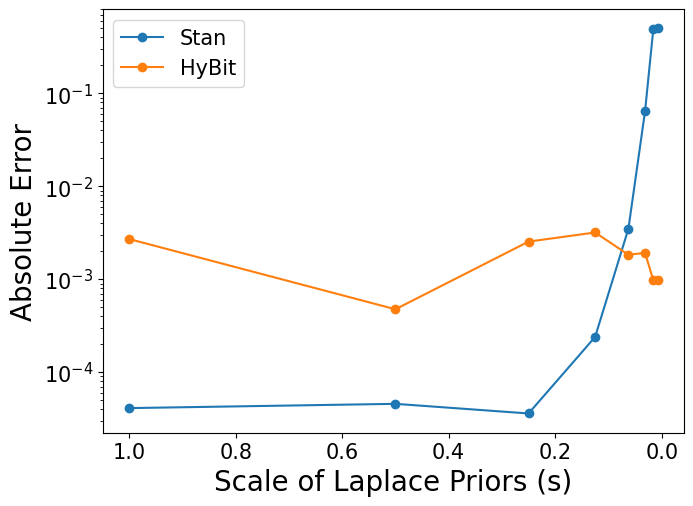

In [11]:
import matplotlib.pyplot as plt

# filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/clt_results.txt", "r")
# lines = filehandle.readlines()

x = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]
y = abs_error
y2 = abs_error_dice
# annot = []
# for i in range(0,11):
#     # i = 1
#     cur = lines[i].split(",")
#     # x.append(float(cur[3]))
#     # y.append(float(cur[2]))
#     annot.append(int(float(cur[0])))

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots()
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Scale of Laplace Priors (s)")
ax.set_ylabel("Absolute Error")
ax.plot(x, y, marker = "o")
ax.plot(x, y2, marker = "o")
ax.invert_xaxis()
# for i in range(11):
#      ax.annotate(annot[i], (x[i], y[i]))

# filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/lpa_results.txt", "r")
# lines = filehandle.readlines()

# x = []
# y = []
# annot = []
# for i in range(0,10):
#     # i = 1
#     cur = lines[i].split(",")
#     x.append(float(cur[2]))
#     y.append(float(cur[1]))
# #     annot.append(int(float(cur[0])))

# # fig, ax = plt.subplots()
# # ax.set_xscale("log")
# # ax.set_yscale("log")
# ax.plot(x, y, marker = "o")
# for i in range(10):
#      ax.annotate(annot[i], (x[i], y[i]))
ax.legend(["Stan", "HyBit"])
fig.savefig("laplace.png", bbox_inches="tight")

HMM

In [6]:
benchmark = "hmm"
files = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# files = ["results_10.txt", "results_5.txt", "results_25.txt", "results_125.txt", "results_625.txt", "results_3125.txt", "results_15625.txt", "results_78125.txt"]

slicstan_time = [13, 63, 278, 802, 1809, 3429, 6120, 11010, 17189, 26560]
iterations = []

abs_error = []
for i in files:
    stan_res = stan_accuracy("", "theta1", gt["hmm"], f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    abs_error.append(stan_res)
    stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    iterations.append(stan_iter)

abs_error

abs_error_dice = []
# files = ["results_1000.0.txt", "results_500.0.txt", "results_250.0.txt", "results_125.0.txt", "results_62.5.txt", "results_31.25.txt", "results_15.625.txt", "results_7.8125.txt"]
for i in files:
    dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark + f"/results_{i}.txt", gt[benchmark], 2, None)
    abs_error_dice.append(dice_res)

abs_error_dice
iterations
# abs_error

20.0,8192.0,0.49999952316284085,644.264364024

20.0,4096.0,0.49999952316284085,750.81488013

20.0,4096.0,0.49999952316284085,878.153956142

20.0,4096.0,0.49999952316284085,888.043005909

20.0,4096.0,0.49999952316284085,898.366308416

20.0,4096.0,0.49999952316284085,1108.460272711

20.0,2048.0,0.49999952316284085,1127.572445115

20.0,1024.0,0.49999952316284085,1146.228552747

20.0,512.0,0.49999952316284085,1137.454751725

20.0,128.0,0.49999952316284085,1151.042291563



[9347155,
 5351134,
 4650733,
 4439753,
 3944833,
 3206363,
 3006528,
 2549115,
 2244999,
 2068424]

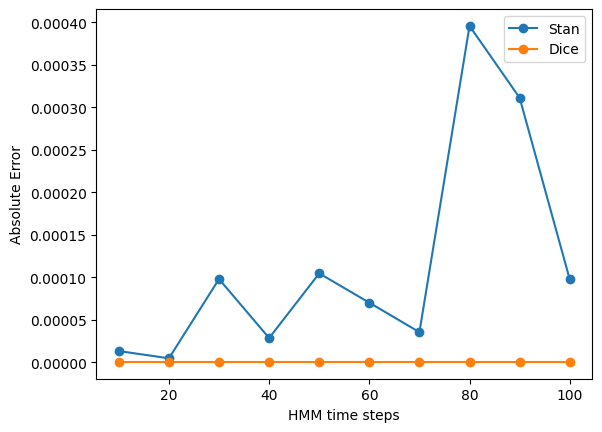

In [7]:
import matplotlib.pyplot as plt

x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = abs_error
y2 = abs_error_dice

fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("Absolute Error")
ax.plot(x, y, marker = "o")
ax.plot(x, y2, marker = "o")

ax.legend(["Stan", "Dice"])
fig.savefig("hmm_error.png", bbox_inches="tight")

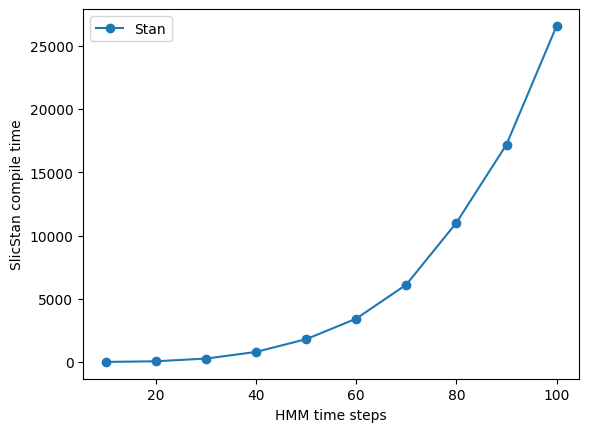

In [7]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("SlicStan compile time")
ax.plot(x, slicstan_time, marker = "o")

ax.legend(["Stan", "Dice"])
fig.savefig("hmm_slicstan.png", bbox_inches="tight")

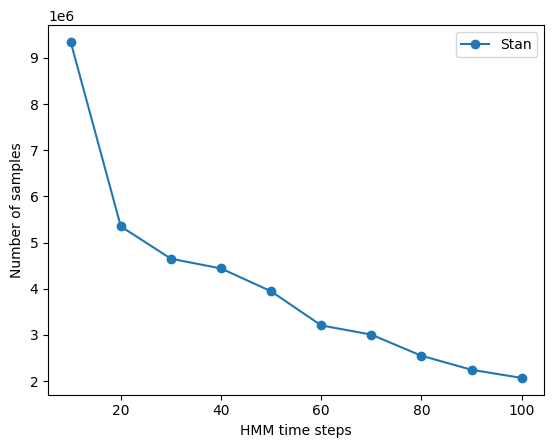

In [8]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("HMM time steps")
ax.set_ylabel("Number of samples")
ax.plot(x, iterations, marker = "o")

ax.legend(["Stan", "Dice"])
fig.savefig("hmm_samples.png", bbox_inches="tight")

4
8
12
16
20
24
28
32
36
40


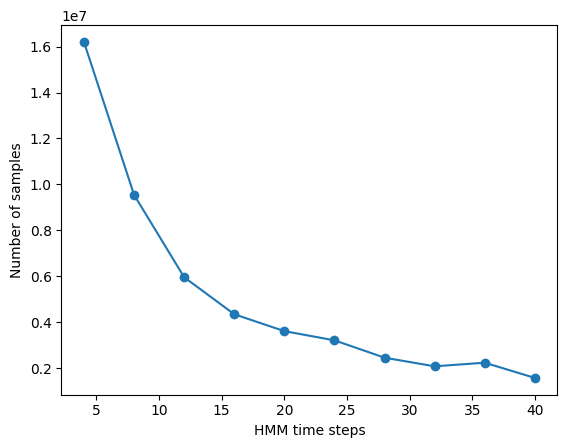

In [18]:
fig, ax = plt.subplots()

ax.set_xlabel("HMM time steps")
ax.set_ylabel("Number of samples")

files = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
iterations = []

abs_error = []
for i in files:
    # stan_res = stan_accuracy("", "theta1", gt["hmm"], f"/space/poorvagarg/benchmarks_stan/hmm/results_{i}.txt")
    # abs_error.append(stan_res)
    print(i)
    stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    iterations.append(stan_iter)
ax.plot(files, iterations, marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("hmm__slicstan_samples.png", bbox_inches="tight")

Gamma

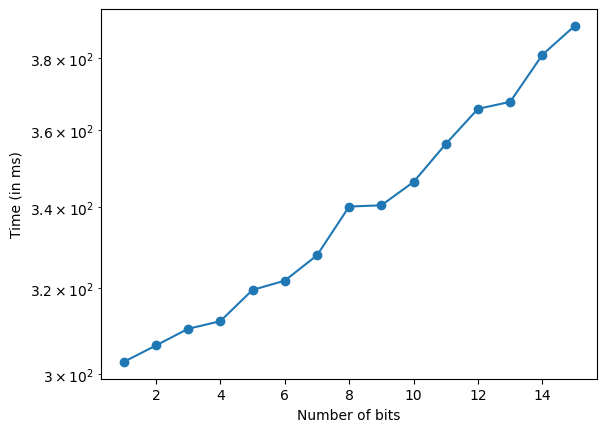

In [4]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in ms)")
ax.set_yscale("log")

files = [i for i in range(1, 16)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/gamma/bit.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("gamma_2_2.png", bbox_inches="tight")

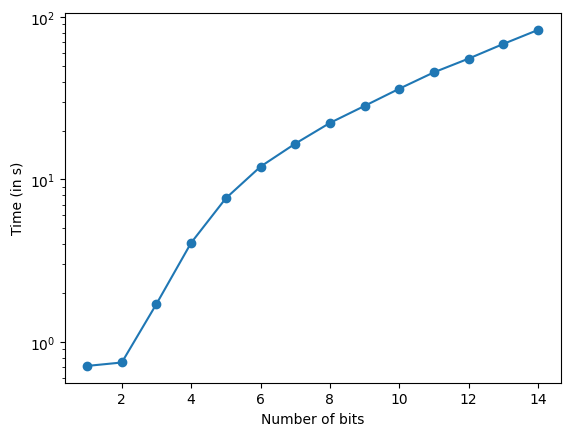

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")

files = [i for i in range(1, 15)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/gamma/bit3.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("gamma_3_2.png", bbox_inches="tight")

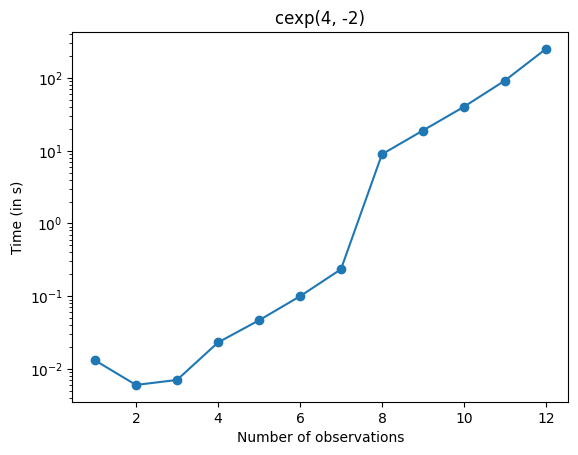

In [10]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of observations")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(4, -2)")

files = [i for i in range(1, 13)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/gamma/and.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split()[0]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("gamma_4_2.png", bbox_inches="tight")

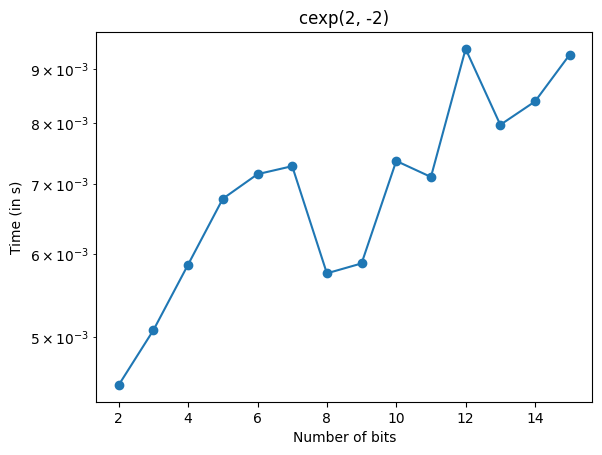

In [17]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(2, -2)")

files = [i for i in range(2, 16)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/gamma/and2.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split(",")[1]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times[1:], marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("gamma_2_2_obs.png", bbox_inches="tight")

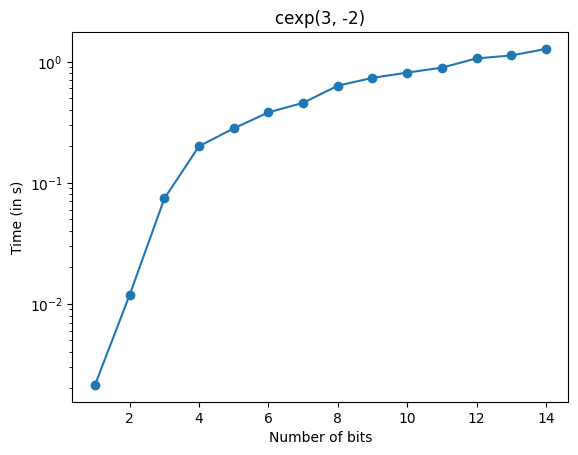

In [18]:
fig, ax = plt.subplots()

ax.set_xlabel("Number of bits")
ax.set_ylabel("Time (in s)")
ax.set_yscale("log")
ax.set_title("cexp(3, -2)")

files = [i for i in range(1, 15)]
times = []

cur = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/gamma/and3.txt")
a = cur.readlines()
for i in range(0, len(a)):
    cur2 = a[i]
    times.append(float(cur2.split(",")[1]))
    # print(i)
    # stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/hmm_slicstan/results_{i}.txit")
    # iterations.append(stan_iter)
ax.plot(files, times, marker = "o")
# ax.legend(["Stan", "Dice"])
fig.savefig("gamma_3_2_obs.png", bbox_inches="tight")

Logical OR

In [89]:
benchmark = "or"
files = [5, 10, 15]
# files = ["results_10.txt", "results_5.txt", "results_25.txt", "results_125.txt", "results_625.txt", "results_3125.txt", "results_15625.txt", "results_78125.txt"]

slicstan_time = [4, 9, 12, 23, 31, 153, 33*60 + 51, 42*60 + 27, 11*60 + 10, 159*60 + 47]
iterations = []

abs_error = []
for i in files:
    stan_res = stan_accuracy("", "prior1", gt["or"], f"/space/poorvagarg/benchmarks_stan/or/results_{i}.txt")
    abs_error.append(stan_res)
    
    stan_iter = stan_iterations(f"/space/poorvagarg/benchmarks_stan/or/results_{i}.txt")
    iterations.append(stan_iter)

iterations += [0, 0, 0, 0, 0, 0]
abs_error

files2 = [i for i in range(5, 55, 5)]

abs_error_dice = []
# files = ["results_1000.0.txt", "results_500.0.txt", "results_250.0.txt", "results_125.0.txt", "results_62.5.txt", "results_31.25.txt", "results_15.625.txt", "results_7.8125.txt"]
for i in files2:
    dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/all_beta_priors"+ f"/results_{i}.txt", gt[benchmark], 2, None)
    abs_error_dice.append(dice_res)

abs_error_dice

abs_error_mcmc = []
for i in files2:
    webppl_res = WebPPL_accuracy("or_"+str(i), "MCMC", gt["or"], 25, lower_limit=20)
    abs_error_mcmc.append(webppl_res)

abs_error_mcmc

abs_error_smc = []
for i in files2:
    webppl_res = WebPPL_accuracy("orsmc/or_"+str(i), "SMC", gt["or"], 25, lower_limit=15)
    abs_error_smc.append(webppl_res)

abs_error_smc, abs_error_mcmc


4901517
111194
1471


FileNotFoundError: [Errno 2] No such file or directory: '/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/all_beta_priors/results_5.txt'

In [88]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = abs_error
y2 = abs_error_dice
y3 = [0, 0]
y4 = abs_error_mcmc
y5 = abs_error_smc

y6 = [7.62939455056788e-06, 0.00012207031244904076, 0.003906249979081733]

fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('xlabel', fontsize=18)
plt.rc('legend', fontsize=15)

ax.set_xlabel("Number of Discrete Variables (T)")
ax.set_ylabel("Absolute Error")
ax.plot(files, y, marker = "o", color="orange", linestyle="dashdot")
ax.plot([15], [y[-1]], marker="X", markersize=20, color="orange")
ax.plot(files2, y2, marker = "o", color="blue")
ax.plot([5, 10], y3, marker = "o", color="green")

ax.plot([10], [0], marker="X", markersize=20, color="green")
ax.plot(files2, y4, marker="o", linestyle="dashed", color="pink")
ax.plot(files2, y5, marker="o", linestyle="dotted", color="red")
# ax.set_yscale("log")

ax.plot([5, 10, 15], y6, marker ='o', linestyle='densely dashdotted', color='purple')
ax.plot([15], y6[-1], marker ='X', markersize=20, linestyle='densely dashdotted', color='purple')

ax.legend(["Stan", "Stan Timeout", "HyBit", "Psi", "Psi Timeout", "WebPPL MH", "WebPPL SMC", "GuBPI", "GuBPI timeout"])
fig.savefig("or_error.pdf", bbox_inches="tight")

NameError: name 'abs_error' is not defined

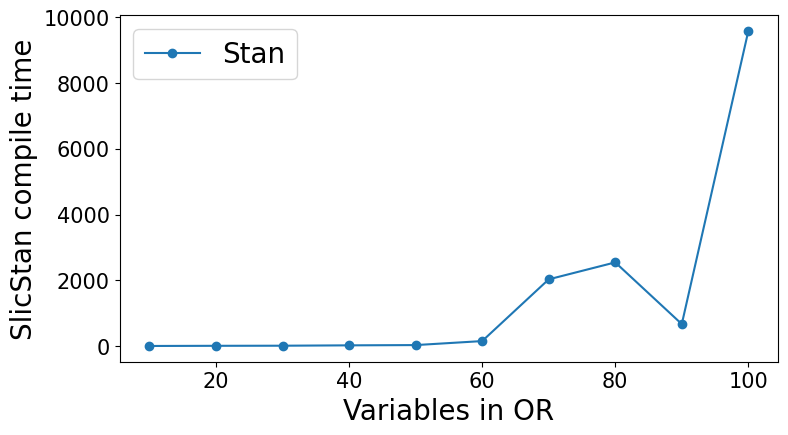

In [21]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Variables in OR")
ax.set_ylabel("SlicStan compile time")
ax.plot(x, slicstan_time, marker = "o")

ax.legend(["Stan", "Dice"])
fig.savefig("or_slicstan.png", bbox_inches="tight")

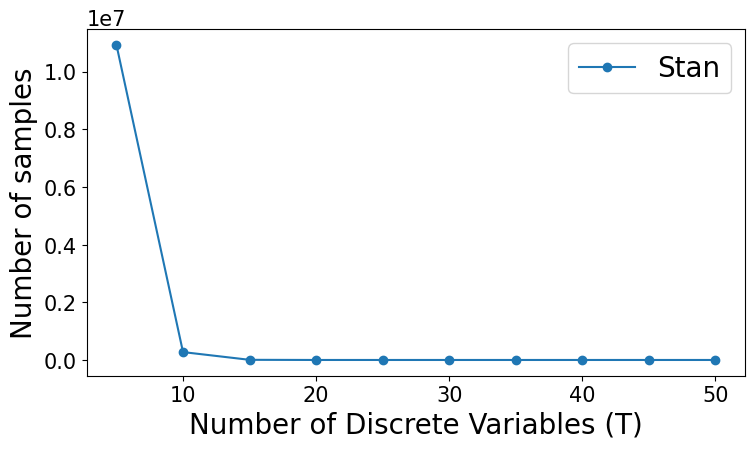

In [53]:
fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Number of Discrete Variables (T)")
ax.set_ylabel("Number of samples")
ax.plot(files2, iterations, marker = "o")

ax.legend(["Stan", "Dice"])
fig.savefig("or_samples.png", bbox_inches="tight")

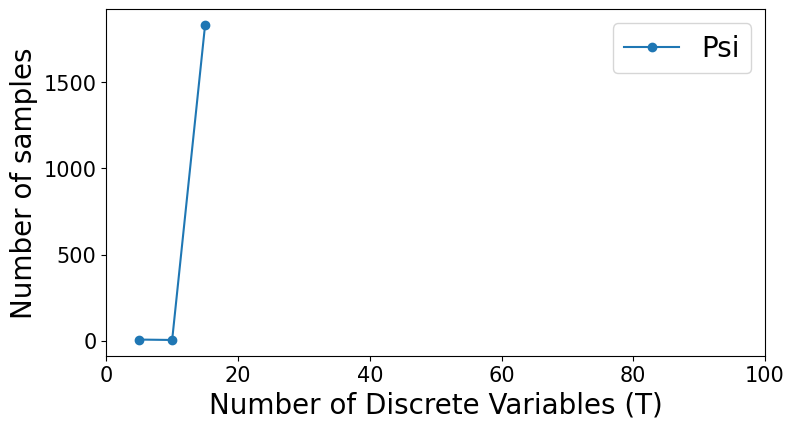

In [28]:
fig, ax = plt.subplots()
plt.xlim(0, 100)
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Number of Discrete Variables (T)")
ax.set_ylabel("Number of samples")
psi_time = [6.654, 4.320, 30*60+32]
ax.plot(files2[:3], psi_time, marker = "o")

ax.legend(["Psi", "Dice"])
fig.savefig("or_samples.png", bbox_inches="tight")

Figure7

In [6]:
import matplotlib.pyplot as plt

filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/clt_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,11):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[3]))
    y.append(float(cur[2]))
    annot.append(int(float(cur[0])))

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time (s)")
ax.set_ylabel("KL divergence")
ax.plot(x, y, marker = "o")
for i in range(11):
     ax.annotate(annot[i], (x[i], y[i]))

filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/lpa_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,10):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[2]))
    y.append(float(cur[1]))
    annot.append(int(float(cur[0])))

# fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.plot(x, y, marker = "o")
for i in range(10):
     ax.annotate(annot[i], (x[i], y[i]))
ax.legend(["CLT (#random variables)", "PA (#pieces)"])
fig.savefig("figure7.png", bbox_inches="tight")
# end
# annotate!(x[1], y[1], annot[1])

FileNotFoundError: [Errno 2] No such file or directory: '/space/poorvagarg/.julia/dev/Dice/scratch/clt_results.txt'

Figure8

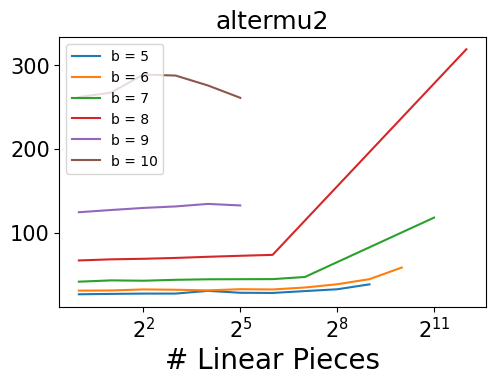

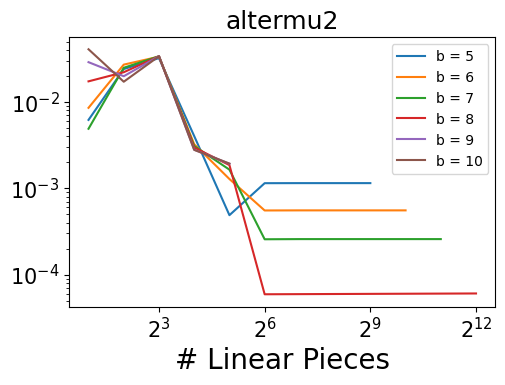

In [7]:
benchmark_name = "altermu2"
bits = 11
pieces = 4
plt.rcParams["figure.figsize"] = [5.50, 3.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=10)

def plot_fig8_time(benchmark_name, pieces, ylabel):
    filehandle = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark_name + "/full_results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))
    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    # ax.set_yscale("log")
    ax.set_xlabel("# Linear Pieces")
    if ylabel:
        ax.set_ylabel("Time (s)")
    ax.set_title(benchmark_name)
    legend_list = []
    # for i in range(15, 20): # weekend
    for i in range(5, 11): # altermu2
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append((float(cur_split[-1])))
        ax.plot(x, y)
        legend_list.append("b = " + str(i))
    ax.legend(legend_list, loc="upper left")
    fig.savefig(benchmark_name + " time.png", dpi=300, bbox_inches="tight")

def plot_fig8_result(benchmark_name, pieces, ylabel):
    filehandle = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/" + benchmark_name + "/full_results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))
    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_xlabel("# Linear Pieces")
    if ylabel:
        ax.set_ylabel("Result (s)")
    ax.set_title(benchmark_name)
    legend_list = []
    # for i in range(15, 20): # weekend
    for i in range(5, 11): #altermu2
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append(abs((float(cur_split[-2]))- gt[benchmark_name]))
        ax.plot(x[1:], y[1:])
        legend_list.append("b = " + str(i))
    ax.legend(legend_list, loc="upper right")
    fig.savefig(benchmark_name + " result.png", dpi=300, bbox_inches="tight")

plot_fig8_time(benchmark_name, pieces, False)
plot_fig8_result(benchmark_name, pieces, False)


Figure9

SyntaxError: invalid syntax (3227301697.py, line 1)

[0.005785435, 0.0074041345, 0.0100424315, 0.01506725, 0.025126091, 0.044084032, 0.091392248, 0.175689231, 0.387366907, 0.8477628235, 1.887189813, 4.303584996, 9.015646818, 20.366195206]


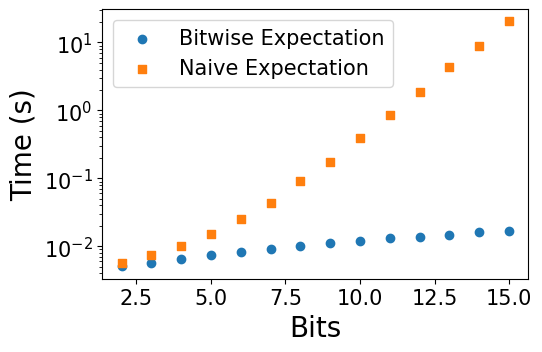

In [34]:
filehandle = open("/space/poorvagarg/.julia/dev/Dice.jl/figures/exp_var.txt")
lines = filehandle.readlines()

plt.rcParams["figure.figsize"] = [5.50, 3.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)

x = []
y1 = []
y2 = []
y3 = []
y4 = []
for i in lines[1:]:
    cur = i.split(",")
    x.append(int(float(cur[0])))
    y1.append(float(cur[1]))
    y2.append(float(cur[2]))
    y3.append(float(cur[3]))
    y4.append(float(cur[4]))

print(y3)

fig, ax = plt.subplots()
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bits")
ax.set_ylabel("Time (s)")
# ax.set_title("Speedup for expectation")
legend_list = ["Bitwise Expectation", "Naive Expectation"]
# legend_list = ["1", "2", "3", "4"]
ax.scatter(x, y1, marker="o")
# ax.plot(x, y2)
ax.scatter(x, y3, marker = "s")
# ax.plot(x, y4)
legend_list.append("b = " + str(i))
ax.legend(legend_list, loc="upper left")
fig.savefig("exp_results.png", dpi=300, bbox_inches="tight")

[0.005785435, 0.0074041345, 0.0100424315, 0.01506725, 0.025126091, 0.044084032, 0.091392248, 0.175689231, 0.387366907, 0.8477628235, 1.887189813, 4.303584996, 9.015646818, 20.366195206]


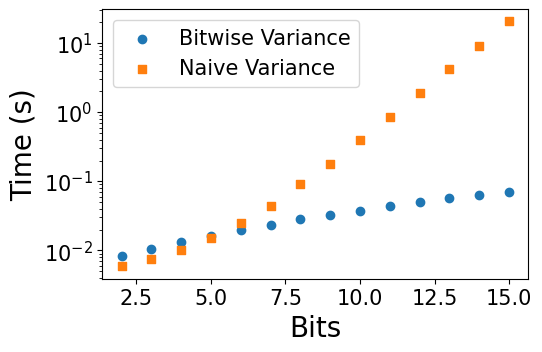

In [35]:
filehandle = open("/space/poorvagarg/.julia/dev/Dice.jl/figures/exp_var.txt")
lines = filehandle.readlines()

x = []
y1 = []
y2 = []
y3 = []
y4 = []
for i in lines[1:]:
    cur = i.split(",")
    x.append(int(float(cur[0])))
    y1.append(float(cur[1]))
    y2.append(float(cur[2]))
    y3.append(float(cur[3]))
    y4.append(float(cur[4]))

print(y3)

fig, ax = plt.subplots()
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bits")
ax.set_ylabel("Time (s)")
# ax.set_title("Speedup for expectation")
# legend_list = ["Expectation from full distribution", "Querying Expectation directly"]
# legend_list = ["1", "2", "3", "4"]
legend_list = ["Bitwise Variance", "Naive Variance"]
# ax.plot(x, y1)
ax.scatter(x, y2, marker="o")
# ax.plot(x, y3)
ax.scatter(x, y4, marker="s")
legend_list.append("b = " + str(i))
ax.legend(legend_list, loc="upper left")
fig.savefig("var_results.png", dpi=300, bbox_inches="tight")

In [8]:
filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/gaussian_var_results.txt")
lines = filehandle.readlines()

x = []
y1 = []
y2 = []
for i in lines[1:]:
    cur = i.split(",")
    x.append(int(float(cur[0])))

    t1 = (cur[1][6:len(cur[1])-1])
    if t1[-2] == "m":
        y1.append(float(t1[:-3]))
    else:
        y1.append(float(t1[:-2])*1000)

    t2 = (cur[2][6:len(cur[2])-1])
    ms = t2.split(" ")[1][0] == "m"
    t2 = t2.split(" ")[0]    
    if ms:
        y2.append(float(t2))
    else:
        # print(t2[:-4])
        y2.append(float(t2)*1000)

print(x, y1, y2)

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bits")
ax.set_ylabel("Time (s)")
# ax.set_title("Speedup for expectation")
legend_list = ["Variance from full distribution", "Querying Variance directly"]
ax.plot(x, y1)
ax.plot(x, y2)
legend_list.append("b = " + str(i))
ax.legend(legend_list, loc="upper left")
fig.savefig("var_resuts.png", dpi=300, bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: '/space/poorvagarg/.julia/dev/Dice/scratch/gaussian_var_results.txt'

Spike and Slab

In [16]:
benchmark = "spike_and_slab"
gt[benchmark] = 0.0
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 40)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

IndexError: list index out of range

Kalman Filter

In [13]:
benchmark = "kalman_filter"
gt[benchmark] = 0.0
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
# webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 15)
# webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 15)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 40)
aqua_res, webppl_smc_res

6.19320529588475 1.769594280211447
6.7652537489080995 1.7335318968533602
5.938554264326578 2.6830195225537645
6.408096517517377 2.162136863127377
6.855168671709163 1.1426214709703126
5.74291968181029 1.60923585015008
5.854525514956142 1.8826996990245322
5.490660619216021 1.4439637555717681
5.169204331998339 0.713198247138812
5.24569092085237 0.9748421241636175
3.9825648334728676 1.0023757645424933
3.6954986630047264 0.6908211521880956
3.6370540709906254 0.6042715188565944
3.432584597238853 0.7808585104146218
3.6107298475232708 0.4651457156278068
3.5479905469503232 0.333556034302815
40


('not supported', 3.432584597238853)

Conjugate gaussians plots

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# from scipy.stats import norm
import statistics

In [16]:
smc_estimated = [2.7558463370784922,2.990986938896368,2.703210475552547,3.360961024009141,2.7931580088681036,2.624886204803354,3.40305539747362,3.4089165908407355,3.0276145971684896,3.452675947368662,3.2976003756136216,2.9389193994757306,3.0002135127923273,4.158105275403516,3.430505851116422,3.023295323153059,2.8325946817244914,3.938988236959654,3.2042123434361582,3.0552183614881216,3.348673092961723,3.054937093916795,2.811982249443659,3.207382857346975,2.7131233829905,2.8009439709507937,3.566784881698422,2.894646080317874,3.4491503273675423,3.5176311344205624,2.875438573687032,3.1666274776516135,2.545414215722122,3.1774894300766614,3.244235994454356,3.066603910537684,2.989436577338309,2.966805733475883,2.707614808206449,3.1331236419203923,3.0592460614579178,2.8998394668311205,2.978949234601138,2.8477092292589283,3.06092220487106,2.868197759245553,3.984625455324795,3.7899264901155068,3.2673247421088365,3.9115408234497306,3.214380566906509,3.3702840260849736,3.2447990885441005,3.101073268852784,3.2685719887448266,3.2577804902870446,3.344450608565412,3.533153843261163,3.006367489859353,3.190851154402331,2.595151956697722,3.19960918815586,3.157639340104149,2.86928928637418,2.8279402839765173,2.768225377772433,3.23262165409883,3.1529203671584773,2.993212821363848,3.984557534117639,2.9178464708257783,2.861152463667254,3.658463930750398,3.2842229609729707,4.093629985905284,3.149744458518286,3.0571755678848707,2.6231725647197353,3.0073351758785187,3.2071275451793406,2.5728569268349295,3.3800541361885674,2.8647524223523644,3.875371936794719,2.9938433322743685,3.131663296957691,3.159899967424137,3.1276404722274087,3.1217109176447115,2.854598374875191,3.1063948530280543,2.8774350078308406,3.608718231213417,3.385922045320633,2.8028879274523844,3.2318170321875526,3.06219076176166,3.5263002944127786,3.8395841411072804,2.752479524814495,3.145873638143196,2.868366131145331,3.43019950465532,2.610607213500915,3.10615201165342,3.3111557350704515,3.377794021987149,3.7644449467927408,3.961867228254585,3.0949337656226845,3.037230965874112,3.360015803322267,3.5479612092324873,3.3352231179473137,3.1461174894336894,3.058419667213556,3.483475212967329,3.2549746359757092,3.544694613009585,2.993089263418808,2.498885833639453,3.4219132645009127,2.9422185763520967,2.8542898266949672,3.2639169388325397,3.300887276170264,2.9758597162084293,3.055845534090779,3.4804022586673877,3.43132038392083,3.053425437346734,4.153760727349066,4.025484474386062,2.9322283890059655,3.1979403519494136,3.239429587560966,3.2957537961955317,2.873384896942121,3.4634806610231017,3.4574924244165794,2.7834225935629098,4.0088134572982295,3.184199794450372,3.0506931193001487,3.045729231054127,3.27961996977486,2.742011495043679,2.826360470256268,3.5075631277988446,3.609717290918666,3.7021580733600166,3.042914900029181,3.182678263870388,3.868037283155318,3.376336259157682,2.695221809408515,2.6547262884657004,3.712864656801785,3.247148956488671,2.534627999236935,3.2415984524692014,3.1273298796394666,3.313326636919549,2.3734640636698376,2.7360686008018162,3.232529441920787,2.807844258574541,2.4270563368889237,2.8501454072435015,2.9784588169433763,3.507659460977093,3.6695502423835333,3.1567175337024294,3.6084185284255765,3.922245666511571,3.168305474377142,3.069137965291958,3.4132560266754637,4.282383040720498,3.059484540833385,4.059829106733571,3.026023471163008,2.9398820035151374,3.216967604410346,3.888441177438346,3.0981724204751337,3.2995989936069807,3.0988588126745498,3.535414969096381,3.801238875189794,3.4754698384997247,2.9604348511514598,2.870036515006728,2.8292926352579677,4.003206317308386,3.0097935798937057,2.6796701818419915,3.4852578904554172,3.3462405568951037,3.174181278431469,3.1970854504768247,3.2056915393673924,3.7158916640832134,3.1347720287158323,2.858828805912749,3.281740993401819,3.61955693349888,2.914289031008176,3.169798202087808,3.1941844343802783,2.68884165749101,2.9039524300945527,3.0634681955290444,3.2060046239903226,2.7278962733592538,3.199411861218798,3.454610589819182,4.188099547640969,3.358814339758131,2.8919724208489317,3.452425357076344,3.5928723426739553,3.1851579121910256,3.478935510037528,2.9353468914984657,3.458471081788294,2.67758354887442,3.2739591967800497,2.9515151348703674,3.2894473322470668,3.1902361682369462,2.9047090093414702,3.311195801991849,3.3151016122716306,3.0944235152546486,3.142184299959576,2.4952121274635495,3.7247238641532032,3.267186333865062,3.522972416918941,2.8755187474176696,3.1946119895548364,3.9257245200899,2.8183233047534326,3.2060404032286063,3.583342895161186,3.3393066085706002,3.0343041344099797,3.131589223061234,3.8121410057832374,3.3934918092488218,3.5657757097793725,2.9529895620529283,3.098452184266693,3.7023598401936626,2.7370963577623675,3.125675007366002,3.4079144155591727,3.1924279321547493,3.2059360006911173,3.1620181381189525,3.3601315531179226,2.9709396628500837,3.5481514888915004,2.959356026956361,2.9797351112927517,3.543402176724636,2.8501096052474932,3.4863720630054527,3.457971517759461,2.91039249478174,3.30252121743968,2.9363547958460785,3.0336814034714368,3.4252278699120446,2.879490883923812,4.341453791368198,3.411269940531194,3.415366853659741,3.591799151023254,2.9707133587854355,2.9442540754434363,3.7474701127201593,2.8600317795920516,3.6908291341701607,3.050696310449213,3.230539370578553,4.409073716986133,3.637467156836896,3.1973148183656246,2.8280370711836675,2.508661508896588,3.6880935146275284,2.9064341692131292,3.3736092660379997,3.05498411964581,2.966165277891478,3.046274025214686,2.9208919092133727,3.143448124813301,2.910603725273437,3.2038368932864367,2.8024306499981186,3.18109769120665,2.8667608354863328,2.990771028893533,3.4177801298052892,2.8225953547057125,2.767476981289608,3.242350978167303,2.4285258829797316,3.276507799166243,3.0141788209939793,3.1611830627679303,3.3069920742008283,3.432525548016453,3.915844011639327,3.267504996360383,3.1406428538162903,2.969169615978388,3.779704523307002,4.00198967812196,2.5950683728943953,3.3596575949626133,2.8154297648668787,3.1558782452016696,2.8233529996836957,3.320134420913526,3.5054934376925067,2.8141701668044767,3.055304253081928,2.828464588018914,3.369678936383634,3.873408923453932,3.431923240531421,3.3771141383093966,3.0321418682776233,3.568604715920837,3.488587266466156,4.247726448664406,3.0696680565412016,4.0048942884748095,3.432890352085988,4.574628453904289,3.4108067166129463,4.084450907821242,2.6525033473902315,3.26612859592788,2.6981172736137986,3.2375774984580015,3.05961274805175,3.055407125767194,3.656557151368217,3.1839952711021904,3.434358665351968,2.6651986174510474,3.715721705524102,2.561392680459236,3.01873897343144,2.850643043250969,3.049100548694532,3.0213981937080057,3.7779208882577553,3.1573504362671363,2.6956291506362913,4.031423238457086,3.96567079100168,3.155018441378062,3.551984207708416,3.255879602020336,3.345461216157264,2.57991404392426,2.9081413658519977,3.3428350340229174,3.140790349863412,2.632933637496322,3.361092093264606,2.954810071114091,3.614471703081439,3.5222487622005403,3.277183920217342,3.817742014829255,2.9597891576860778,3.3601201406185894,3.1339542128407207,3.207478617067274,3.965910795042885,3.3381641901111734,2.9905889176943883,3.3603547051785796,2.887776459572908,3.9533255467855937,3.526160475457404,3.4599770925099924,2.793254742651831,3.6198740494219654,3.475106910790653,3.551451598137332,3.562114177329932,3.0576807688863226,2.6827135552401233,2.8426283409929383,3.05286306909571,2.7680745450325146,3.906421481329709,2.543038673813221,3.1983190346987116,3.9208050610765945,3.9722777802024303,3.1298051126821607,2.8480970776958565,3.4409564638795023,2.858366225033599,3.194138529730403,2.7379656093283398,3.628159401351237,2.5291859548243036,3.1811174713790527,2.9122077490800655,2.9198670316731117,3.958460928234847,3.5487306564924603,4.323861202783873,3.0127094259898475,3.875598866131948,3.3023898550778834,3.079783448426189,2.934644288278867,2.8963731404357937,3.0805752503571413,2.9752321738369334,3.2436436628751766,2.8808585037153622,3.309017470297911,2.993289457314843,3.096920857518193,2.8054073024452872,3.0545861918413375,2.8812296448195345,3.4891219265137674,3.516800596817585,3.425218435380802,3.413496512143827,3.2809072705160656,2.839011831342684,3.804055747890739,2.8335528337608196,2.900266625968833,3.1540081475095527,2.6895493023641386,3.016015100929607,3.077440625504809,3.369901332992465,2.874114994222326,2.8658287320821527,2.9138623945117996,3.6140943850766956,3.4187984004554575,2.8026485941964543,3.36006868974303,3.6295892683152613,2.776646751205711,3.0346099456214457,3.195011308309514,2.8797740538970067,3.3716821404602704,3.879182559016457,2.8823632726352164,3.2018645257720126,3.677718433808944,3.4476513635663504,2.737503844233104,3.12345773966795,3.1659221948732506,3.1866015090148587,2.893654793256365,2.5699673356932906,3.4329750325759227,2.609174668916338,2.66903814519494,3.0743212501372765,3.1014718208372023,3.4276098359867047,3.3844643741913476,3.7195160229583544,3.063345896038458,3.190709283780421,3.8112833042825165,3.404564327484221,3.428158826658617,2.9353812928365164,3.438207169466199,2.7637000686230846,3.9938796801242136,3.729775309305578,2.913644955414527,3.478369481481685,3.7242744703159407,3.2546250066510507,2.828548364800943,2.9212539676783136,3.573036737975078,2.834459650897374,2.855028457056859,3.131274333892502,3.6757538800988576,3.4285537601663187,3.058218334899203,2.90021663163377,2.974112350896064,2.978733072940968,3.269771055942122,3.019833563559797,2.6620968431182783,3.4122106716231144,2.88647596753425,3.0964541584784433,3.122482899999305,3.1537984927501674,2.8226699547024943,3.7857520682935863,2.898814868810434,2.915654860620015,3.4020406532944545,3.06306081291621,2.7535972095293673,2.705146198548464,3.2903024133985115,3.567672458568609,3.5715027461815163,2.9582682816480244,2.9696385931751985,3.786717808104472,2.883243251659874,2.9191620198616155,2.65147332336482,3.0801869245407176,2.68355298124555,3.3215325131463587,3.1899708972224943,3.1478521707632554,3.5388343589656968,3.9026652385950924,3.0821377091030993,3.2815218308364194,3.4564618425677667,3.5982060714790007,3.4871682919895792,3.164616781080373,2.7060774112291033,2.450604410296706,3.00872747173171,3.302937414455181,3.044708699836277,3.765795885886038,2.9530362137939465,3.099249460111467,3.0253149243389874,3.64016685087246,3.476463984961492,2.9811572758302414,3.1934754066133957,4.509538938407182,2.9669230112144156,3.5145277312296126,2.8156297895472027,3.018752280554943,2.948314533814404,3.752339331901387,2.7657268936034094,3.4842966778889815,3.0264904424913333,3.406420698761967,2.999904100412188,3.1852488322724657,3.083598866132254,3.309333060019757,2.895551531675397,3.0973448462021134,3.1150018990502923,3.4001637427055313,3.343400479830012,3.5205985932870942,3.4449955561846433,3.1602432144843426,3.5444020700466496,2.7775487461925223,3.350960764865197,4.050332937034412,3.517896910781995,2.612861234176555,3.4515482499383436,2.8209926947816673,3.275295111700842,2.856332105050718,3.5100497626085643,3.0706160849140445,2.9185656233200787,2.9172704717999287,3.762689199005505,3.465642108081962,2.912335437247787,3.890102800854292,2.8699844844386897,2.8050392427380393,3.256669102320079,3.5149875468532197,3.2517370937268866,3.4652838469375373,2.796030299230962,3.3905535497612465,3.025790810288834,3.2426285275118922,3.7895249499827393,3.3039505872359345,3.362368576250871,2.968584037013684,2.7048250765390107,3.360310407856567,3.1569402861062796,3.713069610649423,3.400932532405474,3.236389363039429,3.319750445869328,3.59158996095093,2.6701825657015426,3.4802656545719404,3.2204099801321773,2.6768702568096026,3.1736699716887378,2.815935369071472,4.134223771576028,3.442992616878821,3.2813468932368273,3.200217370726998,2.9922611594520263,3.2074412262846637,2.8204617521198814,2.7362534289088023,3.3888012797766542,3.1678631743930294,3.8034871726279653,3.1380255909710453,3.326230354529199,2.641214975036292,3.6968034218993586,3.4501394910383243,2.766126479845129,3.4543956134406413,3.212692750791441,4.3437486826642635,3.2474981385655792,3.1886921042347587,3.556593175912099,3.044610259877715,2.762830904693219,3.3195775427218166,3.6704199783800258,3.0382927769935937,3.6998223632369496,3.109066173029514,2.722770712137014,3.0776949571584082,2.9404781904121196,3.228758925495095,3.4059847979448916,3.407206381404646,2.9417631305936496,3.5593658121921044,3.09836218007199,3.089598100303738,2.886894641381356,3.1988473376043154,3.4136629752321626,2.495119758311601,3.4556148342583732,2.8850272536191257,2.878422160489474,3.2541827660075358,3.4250610419305,3.726927785425626,3.6126050560018803,4.321915780173927,3.72645102041657,3.0690284090941558,3.1187398629200422,3.279795135575769,3.3519796272752536,4.392046753911665,3.5205879000113085,2.6931830648692596,3.0603680246167446,2.851998757521168,2.389282900334034,3.0047280094353406,3.186055346866563,3.2482840783332967,3.687107410717886,3.385272217753083,3.125004464503081,2.662907884375142,3.4574671134408845,3.181507760679217,3.462864838018725,2.8911473321715575,3.1247363497582374,3.214325967476949,4.0638101073572725,3.074507944979114,3.5168070301764107,3.7682582180323276,3.0018913979391706,2.8914197916083775,3.3749931928877075,3.8548513655354517,3.25928534271932,3.385883536589862,2.4571570974829773,4.042566953245374,3.500761609248925,3.4823634094166938,3.478695450514212,3.7731405338040718,3.130970142352136,2.833870783023896,2.7085367410174577,3.0005798729699915,3.1066368456880338,2.9217875611808544,4.358996203751036,3.0150020552507666,2.6303386336007475,3.2755005691459766,3.43840569448587,3.9461406988308037,3.749624075179979,3.1729786718138056,2.6651522664500833,3.454777043687196,3.8682747642323605,2.935983826154033,2.5799709629384595,2.6379119250503718,2.69364145220515,2.9908168464104796,3.2992624545255596,2.9102953477276166,3.6065863024493194,3.2173555076584774,2.634618259510003,3.974077106630079,2.954535521810004,3.544368609364025,3.501517104752942,3.5133598747140184,2.7325379467588498,3.0064911373217456,3.8248172791829504,3.4144715499972,2.788997152084617,4.230705083702233,2.5861022001393748,2.726879737732682,3.0295256478400305,2.7044886805514885,3.332425000304444,3.2253524772220494,3.5223466449238656,2.9086480374053996,3.262163766806672,3.1283921683507963,3.2896380989227136,3.30100924322849,3.245446116831598,3.3280401431961506,2.900806421223668,3.558158190337908,3.534782832583779,2.8990815770587464,2.872412934711708,3.030849489209568,2.763184989211174,3.143063939588644,4.089688258175257,3.4497103481993023,3.224363525301146,3.114741840514266,3.8491280936888153,3.521523357546171,3.2573789170813177,3.416843215335257,2.864372667656097,3.123583069604903,3.543535468887345,3.0338396723557137,2.9717086075685826,2.791228152015874,3.896433717723258,3.4109249234077192,2.791693511777958,3.856614059359007,3.2242737161389265,2.8245782067577,2.685166315888216,3.7970107681143843,2.951894933959129,2.479096972534167,3.221784109221234,3.6381116830974323,2.660892816775149,3.0531291389768556,3.2997055913689572,2.986860995075764,3.4053130034719037,3.071143610370102,3.130418924046209,2.9583165328589014,3.1018737231538016,2.8174407895152354,2.755604725229847,2.731159757119471,3.3960009426622726,4.085007779766579,3.278775836423216,2.742204355361057,3.428176342026292,3.852947228519005,3.1644701213516226,3.5878986534490016,3.100642021393988,2.960960074830848,2.790682917259111,2.639359189232666,3.415545280087426,3.095928683199509,2.6225122478192384,3.1686415058818103,3.2860591821268517,2.9019867422086363,3.0632988951209597,2.597617391707829,3.213788466216457,3.301800037837536,3.3989838530615573,3.7199021213586576,2.7582309941751872,3.9340783821954344,3.272924249216745,3.06561985525495,3.0003520117665152,3.273035416980873,3.073980686172206,3.3694318596808843,3.1455298359091564,3.634305462327681,3.1816029761500833,2.715059627346943,3.065739111123889,3.4016393680062245,3.384780855463733,3.2316973545221415,3.0334426025082357,3.7849936533932054,3.574035204735712,2.51387684090977,2.954169223254638,3.853604680655649,2.9641585912712363,2.673874246743389,3.153947695730795,2.9339806856785566,2.9991233429530886,3.269630426977805,2.720840083975029,2.813079006964425,3.4776514727296592,3.4885039693938413,2.7851597270541397,3.296147967836002,2.939687353601462,2.6404291021125523,2.647662536390117,3.050024030726819,2.9724834807913707,3.0995195781159257,2.6747176001474915,3.4267558865201844,3.063520015366849,3.1375566238946084,2.8019204896592074,3.3842861846355587,2.7419253467472515,3.1205736104992066,3.3075821013113735,3.0556842774906916,2.755738148640691,3.7369511581578054,2.945079065115307,3.4036658802676603,3.542815916660677,3.2240725479594756,3.578734096445296,3.5288084938315825,4.299587652891658,3.18424674756755,3.3912086981952574,3.1807715515048915,3.0361755121353178,3.8081837351937913,2.751658260920648,3.084285279965843,3.0673554302502843,2.64848655156982,3.7346584094347843,2.9495541456894188,3.0064851764257394,3.054086832021411,2.9752966628621054,3.6662302104667166,2.971231913027733,3.63443628939452,2.879934070900794,3.292966690038098,3.058142717355922,3.562354049841197,3.1346649085162017,3.6338334237644005,3.6165443829644004,3.121228050020656,3.2426240127307753,3.366594553729612,3.470306295621436,2.9610870986889886,3.1029619754341438,3.3034358426898383,3.2826388167672222,3.4950681749643526,3.1270489156852204,3.00661733035738,3.457920329515891,2.9609941916870297,3.2996176515455686,3.587766259455069,3.1319917994590387,2.8940547525280995,3.614895918457417,3.452298068650049,2.809697529450547,4.135058140055092,3.3432710590748513,3.485347487214756,3.401775185685271,3.1916698648210247,3.1542767155566547,2.8462645815983385,3.5818203624703893,3.3028433752024537,3.34389136173514,3.12090204401937,3.554587470851715,2.7748264549845527,2.910062693485657,2.461165626452767,3.3203426198527226,2.984619047787032,3.434037018560736,3.189723827374155,3.1606037362518413,3.021092069073826,3.5583267897216206,2.835545523056565,3.188676646928596,3.4370350060854435,3.0250293552259557,3.669151539968411,3.655205957308987,3.566566971638866,3.6460296061658517,3.3642319061477166,3.3709822343965903,2.87437295604426,3.1494535204297094,2.9348072072644618,3.6731923341803605,2.985837150843019,2.7771613425621395,2.725410340300794,3.4959443967559616,2.727776567365812,2.7512150021520774,3.0861519022535853,3.568143453520895,2.801745190240046,3.576469976850126,2.673831934187922,2.977315743278322,2.8382638023136177,3.355520332578711,3.191666913170297,3.0423501198303757]
mcmc_estimated = [3.0788421115961544,3.2541301723742104,2.8972128129084584,3.3087542671597787,3.172075218694236,3.3197662185846863,3.659021985377051,3.710906806009668,3.086637692187856,2.8646894739303805,3.847639204842896,3.5811112612228326,4.779295972148944,3.7309771411661528,2.7937906596264965,3.233131915377386,3.0840431880653556,3.4408626583209347,3.0951836384780647,3.284851437011494,3.377310871512364,3.3133366447137433,3.271882457993928,3.127250674679146,3.2795431926822007,3.2468666327403826,3.0065361979094525,2.9988598058184825,3.422220643935119,3.913899990489644,3.068808196341294,3.153438820931388,3.0809232242200344,3.009290642826715,2.763309649883025,3.122412957856064,3.523091051112108,3.2154547359632017,3.0137582482484375,2.5309979598011365,3.6044682749369517,3.4654916822713404,3.683638093343447,3.708343436381134,3.3378020612855934,3.910115477163429,3.064437837231256,3.286191913405397,3.4317732854534047,3.134373495832081,3.033612461288379,3.2884742120902404,3.158035888430617,2.582306241090953,3.0384802513230933,3.370474862293195,3.826598793822853,3.1082843229912034,3.4088187260850695,3.24246260176626,2.9787414782107824,3.325411391266379,3.038918718418152,3.1418245982054382,3.9731863948585904,2.8249797836650425,3.5175557657680367,4.585177639373382,3.974379751585126,2.8414543416563567,3.3410691777529493,3.064293768888866,3.391016285942449,3.2200278077120577,3.0667618152789995,3.4503408943493583,3.1930999284151116,2.9441455143842377,3.158062455363241,4.209043492795538,3.450714166688196,3.103121350489094,3.4407875731158075,3.3122442274888053,3.0631987391141706,3.2736432802497846,2.852328032177013,3.8344272901834544,3.0742237677102366,3.391424196939086,3.1227393368420264,3.6465742811861266,3.1697682206210493,2.9256301838813026,3.227114451295287,3.0099778350714175,3.35917470778051,3.1135198401746176,2.705075867622447,3.8277718109825543,3.106799446928749,3.4349081624797275,4.029421334580307,3.44098029023115,3.16699769473773,3.5384381872952377,3.411837247547637,3.8522742492576842,3.06739703109849,3.535117596827952,3.57772684278823,3.7911843299723818,2.3479074994428086,3.5106432602330533,2.841013277837009,3.283991481696587,3.114952004547625,3.0794101636407274,3.4013053665021746,3.1407965291180564,3.6231683587143375,3.6216748418004876,2.897081338008046,2.803136998926013,3.349596767261599,3.4501971237418387,3.170977299704056,4.5530191119456775,3.266826400262839,2.837390574383726,2.9915125290311844,3.2323152634348125,3.3204756322811013,3.1901475730401656,3.885837420358381,3.1625692111792665,3.3774025138811052,3.1097089452660156,3.557804924710601,3.2666431059958,4.741405793260372,3.6660819788358374,3.1962193793210663,3.3311130298278306,3.683354406638494,3.384868840688018,3.7782840721461732,3.427624206460536,3.28585644725486,3.8670421039166385,3.073024013455612,3.221071427448383,4.359051167557815,3.7149806654722237,3.587850875189859,3.154764417411104,3.0217174095895016,3.2606370864097367,3.1515045469542176,2.958641806896433,3.20570519820534,3.0126955869155716,3.2115818225685713,3.041838966304702,3.8057514577879084,3.315329027743513,3.2427660745540607,3.059583618984992,3.0499267379677946,3.145441939759671,3.3448569049768846,2.8806265553437473,2.9013524009362412,3.746472400470914,3.2016148076813664,3.3084680628410763,2.886194780388372,3.6699278608660064,3.1518054654709644,3.5359628148901763,3.1173781480015466,3.0705492880880456,3.1134337095078974,3.419439417024257,3.836149633403664,3.8124525512519014,3.8488320355573493,3.5848050107468055,3.3551463689598435,3.7106903128435462,4.183369953762937,2.736353357392918,3.2147505523073883,2.994707928892747,3.533231954311745,3.446620706715487,3.321726803618731,3.42139145600992,3.011503629276327,3.1944172991715964,3.5526480863079577,3.5179646228937904,3.2481421599046327,3.460806769811079,3.151893153144287,3.6174010641385963,3.740384717108367,3.4069160362843576,3.943644000160052,3.160525512601385,2.6628414040375397,3.000955119585475,3.2513328425562302,3.3441023663758016,3.6843005422267563,3.3666669128058984,3.8896065173192604,3.24910177182553,3.598284504797461,3.669865378853002,3.1844576676962704,3.4999758932604967,3.6379622128992284,3.369902365305916,2.804011000442433,3.104456609956074,3.6248925498976883,2.8602943434187544,3.289570222867073,3.271172982855703,3.117929815411469,3.361582360114765,3.2451202977689566,2.6333647292773747,3.2178446619423,3.35700790783672,3.0800325486469915,3.4796556307906736,3.8850885283896823,3.222940047460475,3.2639446554086082,3.6910491553312275,3.118342075166542,3.0617250139708863,3.434670660381402,3.5660453665008474,3.195433923583413,3.4148931637524282,3.9139587281256336,3.685336934138344,3.239989862841822,3.0300821356155025,3.7229166422990976,3.0747934324688644,3.009163147168977,3.8181953318404216,3.565412464645673,3.6160820539067693,3.768033137867015,3.3805840338417075,3.593890107016201,3.28006318911331,3.3992471069719663,3.544735066399584,2.9966296106095767,3.533837294215199,3.238226539089195,3.040884349402993,3.810836033101739,3.322920937850109,3.627388962544589,3.2977679847220887,3.634632855842898,3.9194699700159283,3.1472745769033708,3.69345806152208,3.0121650182763138,3.4297824527341456,2.8770794730515337,3.085713777522281,2.724515244319769,2.987681723483596,3.4052846967841073,3.246071499229814,2.826555451002441,3.7978283434359965,3.6915299613878902,3.4034281691411628,3.5757488743847294,2.965725193479254,3.331668180447401,3.5015307175823924,3.867969153984494,3.3670454221456136,3.225186532831763,2.930377317466611,3.415066012389665,3.675378307350042,3.799554009240216,3.276250795063055,3.110137526570863,3.536534577713172,2.908322950207193,2.9917400347937924,3.784997330190474,2.7018449937596793,3.4822003009379663,3.362199450734923,2.9226479993158225,4.235068814266175,3.2384363532531397,3.9322752611667124,3.0396170968703373,3.1569910920256583,3.6275829034396834,3.6253406141092026,2.9383501835595456,2.9399560762653465,2.5237448841396595,3.3119382437506033,3.1562405376686744,3.538053350092921,3.2894697183314814,2.8003752913188085,3.4793339834300987,3.1688396055649934,4.015841600941336,2.889947780164844,3.1933463873208243,3.3154077225533554,3.0437444591121565,4.001601670105839,3.6220593335423423,3.1855303547300506,3.2262396640784186,3.570338586781224,3.507510628870739,2.788888115595891,3.065983041423207,3.1858408124948956,3.825913039151983,3.326457372919446,2.979301430293431,4.123764987301495,3.1996234429211126,3.28051150644159,3.541973321511051,3.010726117269455,2.8634900458861776,3.9537660046494714,3.0520750499590608,3.21984086833746,3.3740617870522374,4.038531798356624,3.5260433484421916,3.9021181705796932,3.5750255244274114,3.313448111548362,3.444500683226191,2.7252859209141373,3.901031057644014,3.7667784384858645,2.5212491899136875,2.670834956895623,3.3434336429868603,3.804531718439047,2.884400154595875,3.2611257458600265,3.4883093919065384,2.6754714305442495,3.3892644741662172,4.023234478116511,3.275424481843635,3.311714542225124,2.812039242642742,3.3412248514729472,3.2736208843159704,3.5000323513919063,3.5614665186649446,3.211954177146649,2.8376427517188345,4.073389942280849,2.650135029195392,4.042119546291582,3.526276220901098,3.471435877950488,3.168701017254996,3.1649455563662405,3.3966979025765305,3.3456845207146455,3.2141663286853372,2.9094915362815144,2.8715697275402348,3.542898463752802,3.1499920625104485,3.5063796025518297,2.9052540423568693,3.4186668517242245,3.1346100246159767,3.261029030558802,2.9534161081374783,3.2969455663644904,3.1255816656410835,3.5080404927369733,3.438553709778929,2.978327705750316,3.4497430778726192,3.6592855522827747,3.3685206057252937,2.829952951740272,3.493383065165668,3.2382854077588124,3.647400470653946,3.2077656231833984,3.3781488597620863,3.1307226082462254,3.136049718998925,3.2692879284017318,3.944222425334085,3.493662518847103,3.191592947071781,3.385918575482562,2.867615893786094,3.173026220003598,3.1019539632163466,3.6635780282786055,3.0249932370538173,4.047951597207347,3.0178461809428994,3.056583373523659,3.2267538629014143,2.9174211959411553,3.9090174750493136,3.6024097116022213,3.86615387570247,3.0015677839225297,3.07464321070739,3.8775287669217344,3.5066917286486596,3.2069467680783075,3.142283137073875,3.397300996536912,3.4478415702436336,3.1834738306694232,3.7834381210898744,3.700393488876508,2.583187973931605,3.285745583300563,3.6731120993147117,3.161533069105747,3.266431390444644,3.6883875657063467,2.858703508421678,3.3037435356334526,2.51667433284252,3.158180403235726,3.0652844759653655,3.1199861645970084,3.345641362429214,3.8190465955918347,2.929204411623125,3.271806948641043,3.370873996689934,3.606169214315311,3.371921368540988,4.114237159498122,3.860794936955083,3.105249143591396,3.3356861189783804,2.6259241529613853,2.925795729365895,3.5840393124059404,3.3783203169839364,3.344106395761373,3.672552038971664,3.709732128629824,3.209258159883122,3.285965576288651,3.610826064286551,3.009023340343967,3.5945287871662814,3.210636211336516,3.020065654222441,3.469646683260279,3.1443583681612437,3.38832173729656,3.6555074342128093,2.8829905612676763,3.636171537112328,2.9750111246922657,3.504948260243129,2.6817056324901993,3.719152194362719,3.903178818485688,3.05484961656526,3.205222350119582,4.284963811492041,3.739065369616982,3.6870111167387085,3.5401071214134094,3.0285571410809164,3.80135522429736,2.9820248179882944,3.2700786114325577,3.393538565504929,2.9068189521519563,3.7020205276584384,3.601094649152596,3.849907345276572,3.3614644829451086,3.071440441312917,3.479983064021225,3.2956669107748757,3.5409411213876143,3.690758174011739,3.610585234606177,3.554137162880435,4.144762972752129,3.2865956561414147,3.4120508147209723,4.370713194635103,3.153125582636524,3.6708946612365154,3.937013123727999,3.151726047014995,3.040575504355146,3.216050809284753,3.2432141513617005,3.308884891951555,3.315667255026398,2.7973060895018462,3.794275624618503,2.744508986172587,3.372470736449103,2.8879562017949474,3.194144071225788,4.036385381177204,3.067745918987984,3.471948349120651,3.243479491648924,3.012438422994513,3.025189301947793,3.287181756163072,2.9698631879740063,3.5147887029504368,3.202748230153672,3.513175486394367,3.1425233307193468,3.3131316711515852,3.5229256276612633,3.05189398667166,3.6550496534134185,3.537367755790792,3.0527046597786827,3.3488072942971905,2.8811216362895156,3.12474805571689,3.1658668018790412,3.1344114830409375,2.699430884702375,2.8367703880086195,3.335100400503904,3.8294458200272343,3.0211764367002756,5.22771458147637,3.470529172746416,3.606054000927334,3.3995665270802435,2.79757785733564,3.39505063284898,3.1059995444643804,3.4230039664784444,3.167052711607712,3.6722919690305975,3.1530247595771765,3.733752785107937,3.5232094148954687,2.8545264660982173,3.0486780652575396,3.9930887299418756,3.9681526475696227,3.3430639443456402,3.1471893955637307,3.512666465658987,3.363906937439748,3.356706682158055,3.418449613455867,2.774287037232888,2.876850117468062,3.1824936107605355,3.5532767669487355,3.7303131293706984,3.1766650648260044,3.1694989806413654,3.221695805570299,3.3024843067265484,3.0519946503721447,2.7124881365094904,3.1923621629733625,2.964109840311818,4.111842974322774,3.1862394354574572,3.0531368942502275,3.086305726822224,2.9175072960089308,3.4356470503503833,3.451017049730584,3.242461868239217,3.5328341228289033,3.1457803895354526,3.3361992609655466,3.3374395225082982,3.480993724836256,3.495219105881388,3.08169663281482,3.0486022598274722,3.9019733505721357,3.7224358485345883,3.282623272779737,2.8400363521402685,3.256515858613826,3.630000297510141,3.965658648833396,3.67155914565546,3.4021890656734475,3.960889998844471,3.08494025039928,3.5496833980122076,3.2625684753711224,2.951802136304086,3.2903053119687526,3.1857113160843404,3.0689099058735803,3.43210328944051,3.033361770856598,2.9119692634922476,3.8836932144996394,2.957158240406939,3.5528639011974343,3.115442160698407,3.1903162956993767,3.0127299246060564,3.5759011094992434,3.418423917656753,3.1395304722691812,2.990799290982558,2.979238395931467,3.4235266087053646,3.9136088834781027,2.906716415722131,3.3407199056870027,3.5172238090963526,3.4324994305562164,3.3917907364000683,3.0881445763662856,2.8721864977362386,2.9911972616872022,3.1590650449277335,3.0689888467101256,3.2365319570422173,2.874503147093616,3.4004444038911608,3.381097367324883,3.1993297337894893,2.882493785692424,3.3478944893263782,3.8114113975563906,4.179505530023278,3.6392014227780063,3.3799179861945228,3.234916608309561,3.7658698621367046,3.198190244907482,3.669619807874922,3.4537855347753883,3.044593941837546,3.2323251142790466,3.376198729375814,3.8902032749289575,3.732450455603489,3.3233700294006323,3.320406346074991,3.572627745413849,3.7058567386510077,3.7168890882841805,3.166617977918967,2.998634968851462,2.6520983718642728,3.4388744530034683,2.955510318526316,3.5437151759603465,3.44907114603609,3.4116815323575804,3.8452905285688943,3.7917461364717986,2.883264573302448,3.227161884516892,3.093813479377778,2.9611726870765613,3.350932687243625,3.3247630486872604,3.149265580967138,3.5227398825947236,3.3629723276742562,2.983661081671419,2.7942410810172134,3.263874662610877,3.3454068727861737,3.3924116246221203,3.4290948421408394,3.327768575555437,3.5004343092710952,3.548758764893063,2.9859659746318408,2.992299584151409,3.661815287248085,3.6648051960030137,3.1357823147367307,3.3655237752552454,2.874043939958928,3.082349194634468,3.5182025869218845,3.0688721945648973,3.6650631652342134,3.2632986053574595,3.435800601688091,3.538688234856746,3.4039548667781565,3.403456645534081,3.3601829838914132,2.9094202056589977,4.024835351192082,3.1023200324163946,3.758392724906062,3.1163518468992955,4.092272189085382,3.187721924086374,3.422067182503539,2.9441752033185775,3.6663546986534374,3.1099957640879765,2.9304802758340776,3.3438031908887096,3.0915594648761244,3.791983599123652,3.7951165500289705,3.15496955123974,3.351099940332628,3.4255747135843837,3.0683471298592506,3.125171157434487,2.9890477628366843,4.171922171627228,3.0480320572895674,3.1473022685358734,2.553767814327499,3.544563295878981,3.1949131476837724,3.0960031672383415,3.664235728479716,3.049294907784924,3.229606909899681,2.8964408066377554,3.468313581096141,3.510771491288466,3.398188320787398,3.2778927194538245,3.2504552841596763,4.031491551586828,2.5096133454603744,2.937978814672696,3.4536308070398873,3.2646203779429115,3.7820702169335623,2.5514358059203395,3.314918811178203,2.7522752364711067,3.735163038404085,3.274300846268997,3.1489757538051912,2.763899657173725,3.209227570340343,3.1112795749438207,3.1178752996858665,3.342320053211802,3.451071290781184,3.0731170370919783,3.123722548238381,2.9440125233840657,3.447531798337492,3.887474305440331,3.8963878994212893,3.2468097226281536,3.015678131936302,3.588909743730526,3.2529963332441976,3.4051032926348324,4.045653419956449,2.771690000893703,3.219050152362877,2.8073189668534964,3.692145978250622,3.1390500864605775,3.1879287904228297,3.829554464158985,3.123994016780019,3.0293736279215486,3.345297875881525,3.2776589857239653,3.2229505836096335,4.098664783336058,3.2391847960478444,3.293978446941572,3.590810765826776,3.101146790219796,3.698945680235256,3.598462504188362,4.042659707354968,3.7766152372075847,2.9229006880067856,3.112131474894925,3.914006066192655,3.2642277047585604,2.987646880728823,3.2092185091491285,3.137847711839287,3.408018441115148,3.4619147491431996,3.474398433895275,3.240549572921315,3.012499695042762,3.066964792295833,3.5179402025645863,3.3697877133557292,3.0906005527052884,3.4341080790229546,3.6138719390044307,3.0371019257597247,3.2949646493162033,4.293691704557947,3.806291393663766,3.062514838293001,3.6082685001992214,3.690737023634792,3.4535278925297233,3.195803900045047,3.432568816687081,3.794951510963649,2.968584483033322,3.7941383565521556,3.166737648352639,3.9536218699838592,3.2664616855112345,2.926096759275409,3.384197507279693,3.708818538331581,3.47229808844849,3.3242568009631333,3.706341201238505,3.8907660338639234,3.367461932311324,3.4900133870914454,2.88283021375044,3.549507952835058,3.26010424699409,2.737906169541331,3.184375920239755,3.107019200876932,3.4932132079971887,3.0962584653779657,3.197472588445659,3.2275657563000486,2.959167385138145,3.4427347565616238,2.9382311081252173,3.0467032354632377,2.7680426820218718,3.144178639093345,3.5052305359651914,2.5738029525122967,3.51330809171822,3.0375425506344076,3.39592558065764,2.9437010653660134,3.377809612736515,3.180940537288509,4.209935683773457,3.8097504047374926,3.7813087462295165,4.063470778277752,3.716787298255995,3.5531261260195417,3.182459115690672,3.12313306000793,3.192672501227347,3.650876402003137,3.46271288170781,3.3386406701397933,3.4458655859500498,4.179084385950602,4.0409402427163394,3.512030661170639,2.5679286044469913,3.5777933778199933,2.932760392288274,3.2167062276025993,3.224667498216163,4.146589931546898,3.7819223359073004,3.461898357812438,2.657808481539454,3.244555245541853,3.278074664193894,2.9721246025101866,3.208956281618825,3.330873211894785,3.4141868210351416,3.0672493534789784,3.2372188511425124,3.0216343665211953,2.818313190335163,3.1722293525429093,2.759595452051431,3.678546078870081,2.964017640242992,2.8603893187539415,2.851851932485816,3.2666449336138865,3.03835710949543,2.900587376664461,3.3361885957715494,3.0127066194457255,3.0388832478223664,3.2538795428737317,3.4529292476020834,2.9820905464984633,3.3958045060788073,3.1507842617687594,3.3544009765407075,3.3474092580262624,3.3821681508262205,2.9235568926154634,3.1171510270601988,3.003764590237754,3.4230892442043768,3.153255976135873,3.4277866944482818,3.3085582661615063,3.3147544445578965,3.310667933539898,3.524126821719298,3.9291866414745154,3.001667386087997,3.529787036561027,3.0702000655795136,4.112553558850722,3.0547022895122296,3.3838292922869053,3.060428640503987,2.8715189392472142,3.598766240476907,3.5360656964350543,3.0107671771430335,3.3001776096381628,3.4317713318053795,3.482261420040741,3.064581987778424,2.9659890985159767,3.0830042677593075,3.7656208886474904,3.624160527095248,3.7001471470942953,3.5799436552585004,4.43022156606081,3.1408488195385162,3.7756883236465217,3.7336453403824104,3.436970538126438,3.468861285482548,3.3002266745588957,2.835970521361661,3.981156616732329,3.4403592500881985,2.8901136166180716,3.1098110812227238,3.1717802156141133,3.6867699330325774,3.2862742008678287,3.2434678960339514,2.8922021016220105,4.127299108635512,3.7349514710825185,4.040981843877043,3.3221826879843968,3.013023779531007,3.5681344230807155,3.0443056170587597,3.7519265101223747,2.8237418977585302,3.24759476325038]

In [84]:
def compute_exp(benchmark_name):
    # print(benchmark_name)
    mypath = "/space/poorvagarg/PLDI2023/gubpi/output/" + benchmark_name + "-norm.bounds"
    filehandle = open(mypath)
    lines = filehandle.readlines()

    x = []
    y1 = []
    y2 = []
    y3 = []
    normalize1 = 0
    normalize2 = 0
    normalize3 = 0
    expectation = 0

    for i in lines[:-1]:
        a = i.split(":")

        if "∞" in i:
            continue
        b = [float(j.strip(" ")) for j in a[0].strip(" ").strip("[]\n").split(",")]
        c = [float(j.strip(" ")) for j in a[1].strip(" ").strip("[]\n").split(",")]
        normalize1 += c[0]
        normalize2 += c[1]
        x.append(b[0])
        y1.append(c[0])
        y2.append(c[1])

        expectation += c[1]*b[0]

    print(normalize1, normalize2)
        

    y1 = [i/normalize1 for i in y1]
    y2 = [i/normalize2 for i in y2]

    return x, y1, y2, expectation/normalize2

39.82783727702899
2.1722063905424643e-20 4.603614114360404e+19


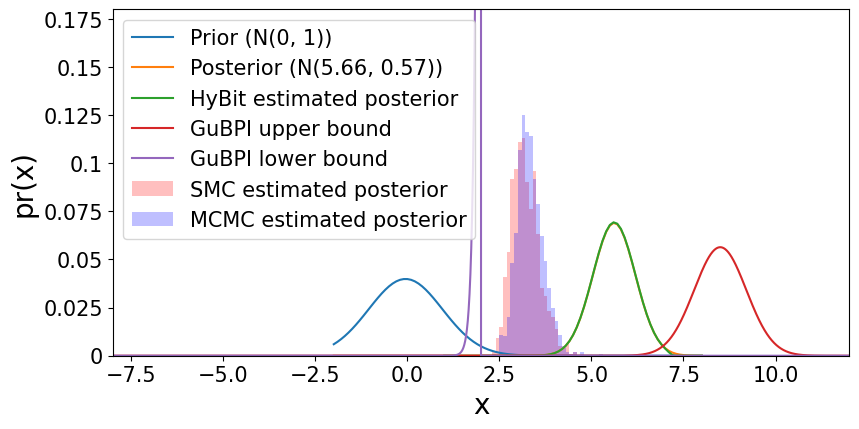

In [91]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [9.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
w = 0.1

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-2, 8.1, 0.1)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

def normal_pr(x):
    return (statistics.NormalDist(mu=0.0, sigma=1.0).cdf(x + 0.1) - statistics.NormalDist(mu=0.0, sigma=1.0).cdf(x))*1000
import math
def normal_pos(x):
    return (statistics.NormalDist(mu=17.0/3, sigma=1.0/math.sqrt(3)).cdf(x + 0.1) - statistics.NormalDist(mu=17.0/3, sigma=1.0/math.sqrt(3)).cdf(x))*1000

print(normal_pr(0))
  
ax.plot(x_axis, [normal_pr(x) for x in x_axis])
ax.plot(x_axis, [normal_pos(x) for x in x_axis])
# plt.show()


w = 0.1
ax.hist(smc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "red")
ax.hist(mcmc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "blue")

file = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/conjugate_gaussians/conjugate_gaussians_16_2048.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*1000 for i in hybit_data]
ax.plot([i/10 for i in range(10, 81, 1)], hybit_data)

x, y1, y2, e = compute_exp("conjugate_gaussians2") # use parameters 1000 256 256 256

ax.plot(x, [i*25.6 * 1000 for i in y2])
ax.plot(x, [i*25.6 * 1000 for i in y1])



ax.legend(["Prior (N(0, 1))", "Posterior (N(5.66, 0.57))", "HyBit estimated posterior", "GuBPI upper bound", "GuBPI lower bound", "SMC estimated posterior", "MCMC estimated posterior"])
# ax.bar([8.0, 9.0])

ax.set_xlabel("x")
ax.set_ylabel("pr(x)")

scale_y = 1000
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)




plt.xlim(-8, 12)
plt.ylim(0, 180)


fig.savefig("conjugate_gaussians.png")

# ax.show()

Multimodal - MCMC samples

ValueError: x and y must have same first dimension, but have shapes (1024,) and (0,)

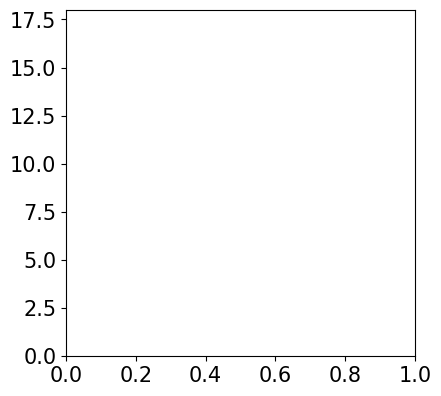

In [6]:
file1 = open("/space/poorvagarg/cmdstan-2.28.2/benchmarks/multimodal/multimodal_samples_1.csv", "r")
lines1 = file1.readlines(100000)
mcmc_samples = []
for i in range(-1, -101, -1):
    mcmc_samples.append(float(lines1[i].split(",")[-2]))

file2 = open("/space/poorvagarg/cmdstan-2.28.2/benchmarks/multimodal/multimodal_samples_2.csv", "r")
lines2 = file2.readlines(100000)
mcmc_samples2 = []
for i in range(-1, -101, -1):
    mcmc_samples2.append(float(lines2[i].split(",")[-2]))





# mcmc_samples = [-5.321316455131474,-5.355140579827021,-5.233490336767545,-6.067015095596283,-4.548800466991291,-5.703062072830024,-4.842569829129043,-5.081115804087283,-4.421406710010476,-4.161711303390016,-4.919536376809643,-4.846695263872425,-5.674426741967488,-5.294554675421254,-4.675151729688979,-4.346175046268987,-5.019901159626997,-5.238937963982364,-4.939731667595425,-4.61950330137317,-5.037857792375063,-4.876001284160546,-4.425722343068648,-6.244080868088658,-4.007556450309569,-5.39244419389785,-3.9130300163797673,-5.0432372920101685,-3.730240706987388,-6.281326999350051,-5.157141563493664,-5.008660329457878,-5.246187350204035,-5.30697120173472,-5.232961291989078,-4.638394171221466,-5.868002558649008,-4.955346419628353,-5.7325841694954685,-4.367123184199796,-5.781732005720217,-5.30369352247955,-5.529961146980136,-4.5501223513582305,-4.329346777699819,-5.595307871330695,-5.605970371569017,-5.593581008684544,-5.127018171131782,-4.8575581372950625,-5.546477707833224,-5.095876232028193,-4.427219439842593,-4.849227833570057,-5.292726468068822,-5.471435792732446,-4.672405031361396,-5.262095012311124,-4.578282396416381,-5.021868595147214,-4.942979120956043,-5.190938133270016,-5.064089249425432,-5.493751228124197,-5.48320140931662,-4.725561899428199,-5.178980767484936,-4.650467942970524,-4.125211732755207,-3.994294768299944,-4.391564144790965,-4.946782164528411,1.2988928671129178,-5.740806876243877,-5.104979943258394,-3.8573276248068398,-5.131200469931176,-4.780781821994093,-5.390843540221784,-5.495287333849501,-5.38586662787941,-4.094245216322156,-4.991655504926896,-6.3457096153307475,-5.390338988731538,-5.645048073577354,-4.826393051668881,-5.159839627390694,-4.075466638350983,-5.028836116447421,-5.64306486373272,-6.098157414352456,-5.306224151498137,-5.905402808069706,-4.945545099682993,-4.690125986811691,-5.977168120140098,-4.367123184199796,-3.4927494082391606,-5.926120163832372]
# mcmc_samples2 = [5.3116492784402105,4.96287658036718,4.693991376737534,4.978893880084266,4.807424112099266,5.043251037325479,5.002745713260297,5.128123885009591,5.236156857318935,4.964366725495933,5.045955044985327,4.534787351141534,4.848811198913965,5.101938474658217,4.5543078858271935,5.713174849187091,4.517491368358664,5.385364376960139,5.250225945883789,4.762606819723282,5.334472666462586,4.990184586242447,5.164334396044917,4.437320296889747,5.359799876411509,4.90485703102088,5.342092841875766,5.662058098167974,4.812412547378678,4.578121282412445,5.334472666462586,5.196537648598212,5.2647976336340285,5.487313588599507,5.019203854114686,5.0320044742685734,5.0433805086088395,5.4899005134725085,4.504103065811974,5.0790943510147075,5.013087850666883,5.253268239180125,5.42494892063007,5.129639063078916,5.859916124123895,5.366468610554215,5.80586120765038,4.867094368353411,4.917628691693704,5.026797167914664,5.043551017753835,4.650852575088083,4.011602618219986,5.210870559071634,5.2940441420411934,5.26663316577435,4.960208041002326,5.7731094597492385,4.733648478955986,5.2279532411414635,5.242556637955195,4.227032721216373,5.0645352359442555,5.693272327366622,4.777141880669607,5.7165904920596615,4.513469905512513,4.286172926297819,5.207536553408746,5.086598806147579,4.011602618219986,4.5854256656815835,4.860790040892319,5.207623888923657,4.757643360030338,5.0907380250272976,5.039537464575903,5.75443441893153,4.6864511105535,5.5958949477659345,5.0274767548348915,5.224168518417544,5.359412369964098,5.042543892611337,5.013756830185163,5.26751939973186,4.994800684862162,4.511301256802195,5.285257369014978,4.8475808364621304,4.874903496865409,5.122569224652865,5.590679634751843,5.466758761045749,5.4686370045862,5.352646367784651,4.8160419168025,5.248261996636317,5.436046349957406,5.011419895882324]

import math
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [4.5, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
plt.ylim(0, 18)
w = 0.1

file = open("/space/poorvagarg/.julia/dev/Dice.jl/multimodal_6_256.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*640 for i in hybit_data]

ax.plot([i for i in np.arange(-8, 8, 0.015625)], hybit_data, color="purple")


w = 0.1
ax.hist(mcmc_samples, bins = np.arange(-6, 6 + w, w), alpha = 0.25, color="red")
ax.hist(mcmc_samples2, bins = np.arange(-6, 6 + w, w), alpha = 0.25, color="blue")



ax.legend(["HyBit", "Stan HMC Run 1", "Stan HMC Run 2"])
# ax.bar([8.0, 9.0])

ax.set_xlabel("mu1")
# ax.set_ylabel("pr(mu1)")

from matplotlib import ticker

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("multimodal_mcmc_hmc.png", bbox_inches='tight')

MCMC-  MH

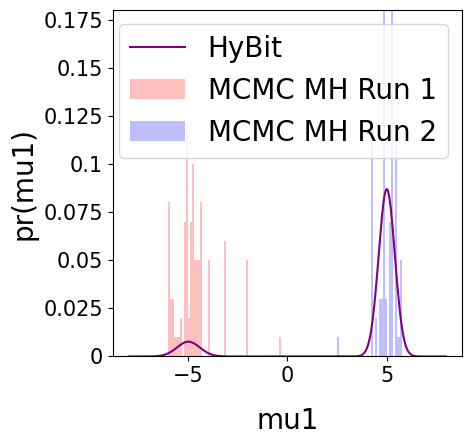

In [17]:
mcmc_samples = [-4.972877252229058,-5.8835831550427224,-5.043916188481671,-4.468301034065018,-5.8322011458449134,-5.9486775454141565,-4.810566990491992,-5.053578061057608,-3.9248329244224385,-6.093210935624584,-4.861111649362306,-3.9162389411845036,-4.7188927025004554,-5.904816719672374,-6.093210935624584,-4.7188927025004554,-4.741619976168469,-4.377026991830562,-5.053578061057608,-4.741619976168469,-5.904816719672374,-4.377026991830562,-5.059245041042267,-4.929152009281275,-4.56067504240393,-4.56067504240393,-4.741619976168469,-4.89569840525208,-4.7188927025004554,-3.9539137272230613,-3.136704800755594,-4.582268762348072,-2.0828998086453083,-4.810566990491992,-4.634296200074161,-4.369437153443351,-5.179852756819603,-3.9539137272230613,-4.377026991830562,-4.468301034065018,-5.730633562291203,-5.129795320337272,-3.136704800755594,-5.431181519193664,-5.529694022675031,-5.8322011458449134,-5.904816719672374,-5.010153766771048,-3.136704800755594,-5.904816719672374,-4.741619976168469,-5.129795320337272,-3.136704800755594,-5.053578061057608,-4.614990597711583,-4.614990597711583,-4.620012255281036,-3.136704800755594,-4.348010867355755,-4.634296200074161,-4.810566990491992,-5.904816719672374,-4.468301034065018,-5.129795320337272,-2.0828998086453083,-5.179852756819603,-4.810566990491992,-4.468301034065018,-2.0828998086453083,-4.377026991830562,-5.3035852997085655,-5.6099781618015,-5.904816719672374,-5.059245041042267,-5.904816719672374,-5.053578061057608,-5.059245041042267,-4.741619976168469,-4.58776212660127,-6.093210935624584,-5.053578061057608,-5.129795320337272,-4.468301034065018,-4.582268762348072,-5.3035852997085655,-3.136704800755594,-4.741619976168469,-5.053578061057608,-5.129795320337272,-5.730633562291203,-4.348010867355755,-5.730633562291203,-4.810566990491992,-2.0828998086453083,-2.0828998086453083,-4.377026991830562,-0.3020409801474395,-3.9539137272230613,-4.745225105713253,-5.010153766771048]
mcmc_samples2 = [5.265399110174624,5.184205653369311,4.663074888839699,5.765557613324706,4.207317011306248,5.265399110174624,9.60787906816039,4.980964864971945,4.865699916991435,2.5255828399193945,5.265399110174624,4.865699916991435,5.265399110174624,5.471676510075245,5.265399110174624,4.865699916991435,4.663074888839699,4.207317011306248,5.5213948614455575,4.865699916991435,5.1421889315307965,5.4833194496095885,5.4833194496095885,4.207317011306248,5.265399110174624,5.7807756422815935,4.865699916991435,4.879209032553675,5.265399110174624,5.265399110174624,5.265399110174624,4.233849470975329,5.4833194496095885,4.420450726938757,5.265399110174624,5.265399110174624,5.184205653369311,5.765557613324706,5.265399110174624,4.809331312678385,4.865699916991435,5.265399110174624,4.663074888839699,4.879209032553675,5.227529824207284,5.4833194496095885,4.865699916991435,4.865699916991435,4.207317011306248,4.233849470975329,5.184205653369311,5.265399110174624,4.865699916991435,5.265399110174624,5.485700381973434,5.184205653369311,4.225212924685245,5.265399110174624,4.207317011306248,4.865699916991435,5.661416558668549,4.758510653592122,4.233849470975329,5.4833194496095885,4.865699916991435,4.865699916991435,4.233849470975329,5.4833194496095885,5.7807756422815935,4.207317011306248,5.265399110174624,4.980964864971945,5.265399110174624,4.879209032553675,4.865699916991435,5.265399110174624,5.227529824207284,5.265399110174624,4.437167108420784,5.4833194496095885,4.879209032553675,5.227529824207284,5.265399110174624,5.471676510075245,5.184205653369311,4.207317011306248,5.265399110174624,5.265399110174624,4.7341938929857825,5.4833194496095885,5.265399110174624,4.879209032553675,4.710296136905853,5.184205653369311,5.265399110174624,4.865699916991435,5.265399110174624,5.265399110174624,5.7807756422815935,4.980964864971945]

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [4.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
plt.ylim(0, 18)
w = 0.1

file = open("/space/poorvagarg/.julia/dev/Dice.jl/multimodal_6_256.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*640 for i in hybit_data]

ax.plot([i for i in np.arange(-8, 8, 0.015625)], hybit_data, color="purple")


w = 0.1
# ax.hist(smc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "red")
# ax.hist(mcmc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "blue")
ax.hist(mcmc_samples, bins = np.arange(-6, 6 + w, w), alpha = 0.25, color="red")
ax.hist(mcmc_samples2, bins = np.arange(-6, 6 + w, w), alpha = 0.25, color="blue")




ax.legend(["HyBit", "MCMC MH Run 1", "MCMC MH Run 2"])
# ax.bar([8.0, 9.0])

ax.set_xlabel("mu1", labelpad=15)
ax.set_ylabel("pr(mu1)")

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("multimodal_mcmc_mh.png", bbox_inches='tight')

SMC

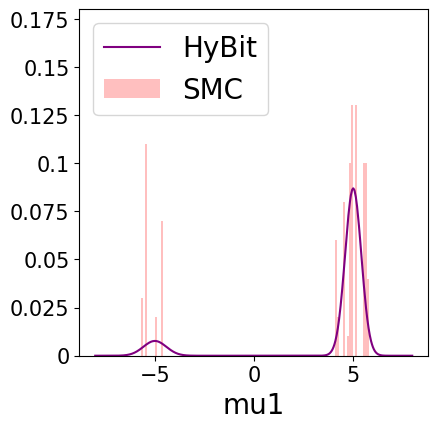

In [18]:


smc_samples = [4.931763534677909,4.931763534677909,-4.9320891338890585,5.621259778630396,5.12465160042257,5.12465160042257,5.621259778630396,4.931763534677909,-4.6579432517491455,4.876504731477834,5.5838924471357245,5.12465160042257,5.771266945978422,4.585504931126646,-4.6579432517491455,-5.640631533190109,4.931763534677909,4.931763534677909,4.876504731477834,4.584621406564235,5.146053175145614,5.554477042788893,-5.447509490383438,4.585504931126646,-5.447509490383438,5.5838924471357245,4.876504731477834,5.621259778630396,4.149858974125451,5.621259778630396,4.931763534677909,5.771266945978422,5.771266945978422,5.621259778630396,5.554477042788893,4.163566109577072,5.621259778630396,-4.6579432517491455,4.931763534677909,-5.640631533190109,4.876504731477834,-4.6579432517491455,4.584621406564235,4.149858974125451,5.12465160042257,4.897173319391566,-5.447509490383438,-5.447509490383438,-5.447509490383438,-5.447509490383438,5.5838924471357245,5.5838924471357245,-5.447509490383438,-5.447509490383438,5.146053175145614,4.585504931126646,4.876504731477834,4.149858974125451,-5.447509490383438,5.146053175145614,-4.9320891338890585,5.5838924471357245,4.800049652986203,4.931763534677909,5.621259778630396,4.227752656874745,4.585504931126646,5.621259778630396,4.931763534677909,-4.6579432517491455,5.146053175145614,5.5838924471357245,-4.6579432517491455,4.931763534677909,-4.6579432517491455,4.876504731477834,5.146053175145614,5.5838924471357245,5.5838924471357245,-5.447509490383438,4.584621406564235,5.146053175145614,5.146053175145614,4.149858974125451,4.931763534677909,5.621259778630396,5.12465160042257,5.146053175145614,4.800049652986203,4.897173319391566,4.149858974125451,5.621259778630396,4.726788745240697,4.584621406564235,-5.447509490383438,4.931763534677909,4.931763534677909,5.771266945978422,-5.640631533190109,4.227752656874745]

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [4.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
plt.ylim(0, 18)
w = 0.1

file = open("/space/poorvagarg/.julia/dev/Dice.jl/multimodal_6_256.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*640 for i in hybit_data]

ax.plot([i for i in np.arange(-8, 8, 0.015625)], hybit_data, color="purple")


w = 0.1
# ax.hist(smc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "red")
# ax.hist(mcmc_estimated, bins=np.arange(-2, 8 + w, w), alpha = 0.25, color = "blue")
ax.hist(smc_samples, bins = np.arange(-6, 6 + w, w), alpha = 0.25, color="red")



ax.legend(["HyBit", "SMC"], loc="upper left")
# ax.bar([8.0, 9.0])

ax.set_xlabel("mu1")
# ax.set_ylabel("pr(mu1)")

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("multimodal_smc.png", bbox_inches='tight')

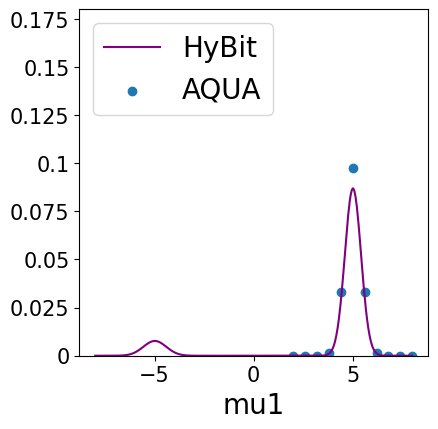

In [73]:
AQUA_x = [   2.000000000000000000E0,   2.600000000000000000E0,   3.200000000000000000E0,   3.800000000000000300E0,   4.400000000000000000E0,   5.000000000000000000E0,   5.600000000000000000E0,   6.199999999999999000E0,   6.799999999999999000E0,   7.399999999999999000E0,   7.999999999999998000E0]
AQUA_y = [ 1.101774238963736600E-12,  1.834150538958005000E-8,  3.521285683062886000E-5,  7.796352435180525000E-3,  1.990698937241850200E-1,  5.861970452823937000E-1,  1.990698937241850200E-1,  7.796352435180525000E-3,  3.521285683062852000E-5,  1.834150538954174500E-8, 1.101774238778373800E-12]
from matplotlib import ticker
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [4.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
w = 0.1

file = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/multimodal/multimodal_6_256.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*640 for i in hybit_data]

ax.plot([i for i in np.arange(-8, 8, 0.015625)], hybit_data, color="purple")

ax.scatter(AQUA_x, [y*100/6 for y in AQUA_y])

plt.ylim(0, 18)






ax.legend(["HyBit", "AQUA"], loc="upper left")
# ax.bar([8.0, 9.0])

ax.set_xlabel("mu1")
# ax.set_ylabel("pr(mu1)")

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("multimodal_aqua.png", bbox_inches='tight')

HyBit and Gubpi

0.9481302444677366 1.0547074158792862


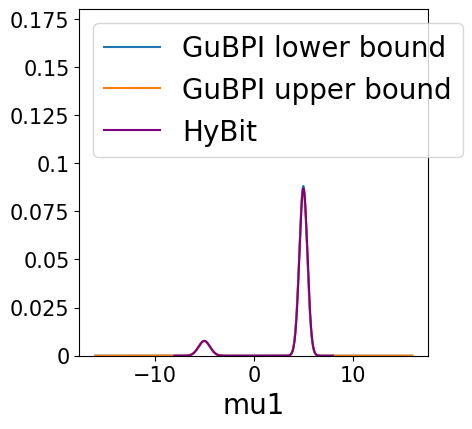

In [93]:
# AQUA_x = [   2.000000000000000000E0,   2.600000000000000000E0,   3.200000000000000000E0,   3.800000000000000300E0,   4.400000000000000000E0,   5.000000000000000000E0,   5.600000000000000000E0,   6.199999999999999000E0,   6.799999999999999000E0,   7.399999999999999000E0,   7.999999999999998000E0]
# AQUA_y = [ 1.101774238963736600E-12,  1.834150538958005000E-8,  3.521285683062886000E-5,  7.796352435180525000E-3,  1.990698937241850200E-1,  5.861970452823937000E-1,  1.990698937241850200E-1,  7.796352435180525000E-3,  3.521285683062852000E-5,  1.834150538954174500E-8, 1.101774238778373800E-12]
from matplotlib import ticker
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [4.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=20)
w = 0.1

file = open("/space/poorvagarg/.julia/dev/Dice.jl/benchmarks/multimodal/multimodal_6_256.txt", "r")
hybit_data = file.readlines()
hybit_data = [float(i)*640 for i in hybit_data]



x, y1, y2, e = compute_exp("multimodal")

ax.plot(x, [i * 640 for i in y1])
ax.plot(x, [i * 640 for i in y2])
ax.plot([i for i in np.arange(-8, 8, 0.015625)], hybit_data, color="purple")

# ax.scatter(AQUA_x, [y*100/6 for y in AQUA_y])

plt.ylim(0, 18)






ax.legend(["GuBPI lower bound", "GuBPI upper bound", "HyBit"], loc="upper left")
# ax.bar([8.0, 9.0])

ax.set_xlabel("mu1")
# ax.set_ylabel("pr(mu1)")

scale_y = 100
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

fig.savefig("multimodal_gubpi.png", bbox_inches='tight')

Waiting Times

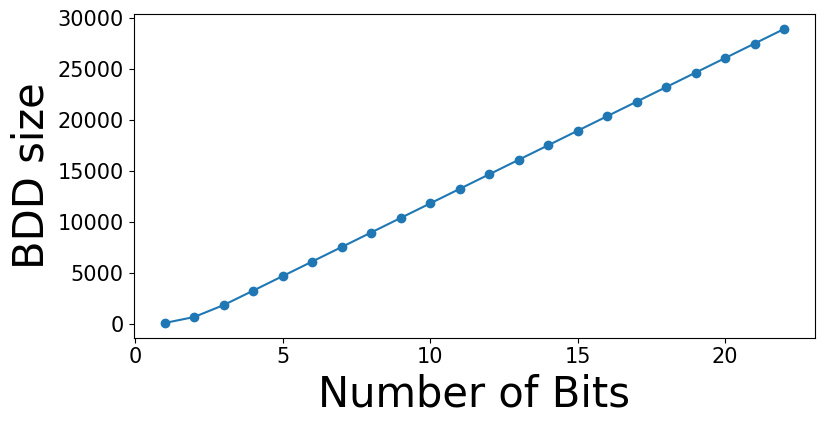

In [11]:
BDD = [84, 670, 1839, 3251, 4677, 6103, 7529, 8955, 10381, 11807, 13233, 14659, 16085, 17511, 18937, 20363, 21789, 23215, 24641, 26067, 27493, 28919]

bits = [i for i in range(1, 23)]

# plt.rcParams["figure.figsize"] = [.50, 4.50]

plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=30)
plt.rc('legend', fontsize=10)

fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(bits, BDD, marker="o")
ax.set_xlabel("Number of Bits")
ax.set_ylabel("BDD size")

fig.savefig("waiting_time_BDD.png")



<Figure size 850x450 with 0 Axes>

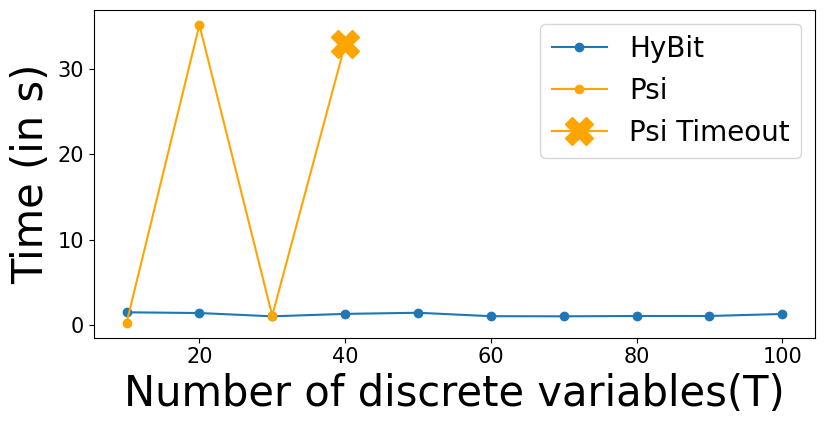

In [19]:
x = [i for i in range(10, 101, 10)]

psi_y = [0.279, 35.155, 1.122, 32.885]

dice_y = [1.51, 1.425, 1.041, 1.326, 1.458, 1.056, 1.043, 1.078, 1.080, 1.315]

plt.rcParams["figure.figsize"] = [8.50, 4.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=30)
plt.rc('legend', fontsize=20)
plt.tight_layout()

fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.plot(x, dice_y, marker="o")
ax.plot([i for i in range(10, 41, 10)], psi_y, marker = "o", color="orange")
ax.plot([40], [32.885], marker = "X", color="orange", markersize=20)
ax.set_xlabel("Number of discrete variables(T)")
ax.set_ylabel("Time (in s)")

ax.legend(["HyBit", "Psi", "Psi Timeout"])

fig.savefig("waiting_time_psi.png")




Plotting gubpi results

3.880805112986185


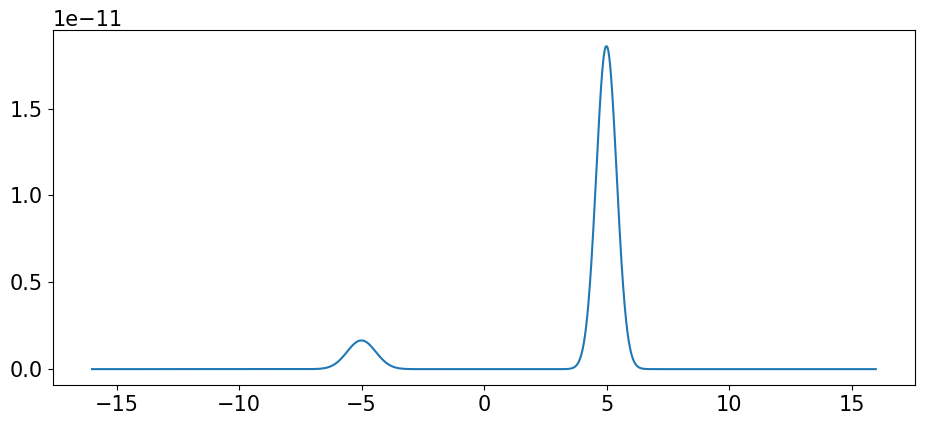

In [58]:
def compute_exp(benchmark_name):
    # print(benchmark_name)
    mypath = "/space/poorvagarg/PLDI2023/gubpi/output/" + benchmark_name + "-unnorm.bounds"
    filehandle = open(mypath)
    lines = filehandle.readlines()

    x = []
    y1 = []
    y2 = []
    y3 = []
    normalize1 = 0
    normalize2 = 0
    normalize3 = 0
    expectation = 0

    for i in lines[:-1]:
        a = i.split(":")

        if "∞" in i:
            continue
        b = [float(j.strip(" ")) for j in a[0].strip(" ").strip("[]\n").split(",")]
        c = [float(j.strip(" ")) for j in a[1].strip(" ").strip("[]\n").split(",")]
        normalize1 += c[0]
        normalize2 += c[1]
        x.append(b[0])
        y1.append(c[0])
        y2.append(c[1])

        expectation += c[1]*b[0]
        

    # y1 = [i/normalize1 for i in y1]
    y2 = [i for i in y2]

    return x, y1, y2, expectation/normalize2

# x, y1, y2, e = compute_exp("conjugate_gaussians2")
x, y1, y2, e = compute_exp("multimodal") #1000 64 64 64

print(e)

fig, ax = plt.subplots()
fig.set_tight_layout(True)
# ax.plot(x, y1)
ax.plot(x, y2)